In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load Hurricanes v3 data set from CSV, add Elevation columns, and use Google Maps API to get elevation for each observation from Lat and Long. 
# Write updated data set to Hurricanes v4 CSV

import requests
import pandas as pd
import geopy.distance
APIKEY = 'GOOGLE API KEY'

url = f'https://maps.googleapis.com/maps/api/elevation/json?key={APIKEY}&locations='
data = pd.read_csv('c://print//hurricanes3.csv')
data['Elevation'] = ''
for index, row in data.iterrows():
   az = str(row['LatN']) + '%2C' + str(-row['LongW'])
   r = requests.post(url + az)
   if len(r.json().get('results')) > 0:
     data.loc[index,'Elevation'] = int(r.json()['results'][0]['elevation'])
   else:
      break

data.to_csv('c://print//hurricanes4.csv')

In [3]:
# Hurricanes v4 CSV was modified in Excel to add several new variables that refer to future or previous variables from the same storm.
# Load Hurricanes v5 data set from CSV, and calculate speed using geopy from Lat/Long, previous Lat/Long and HoursPassed.
# Write updated data set to Hurricane v6 CSV.

data = pd.read_csv('c://print//hurricanes5.csv')

for index, row in data.iterrows():
   dist = geopy.distance.geodesic((row['LatN'],-row['LongW']), (row['PLatN'],-row['PLongW'])).nm
   if row['HoursPassed'] == 0:
      data.loc[index,'Speed'] = 0
   else:
      data.loc[index,'Speed'] = int (dist / row['HoursPassed'])

data.to_csv('c://print//hurricanes6.csv')


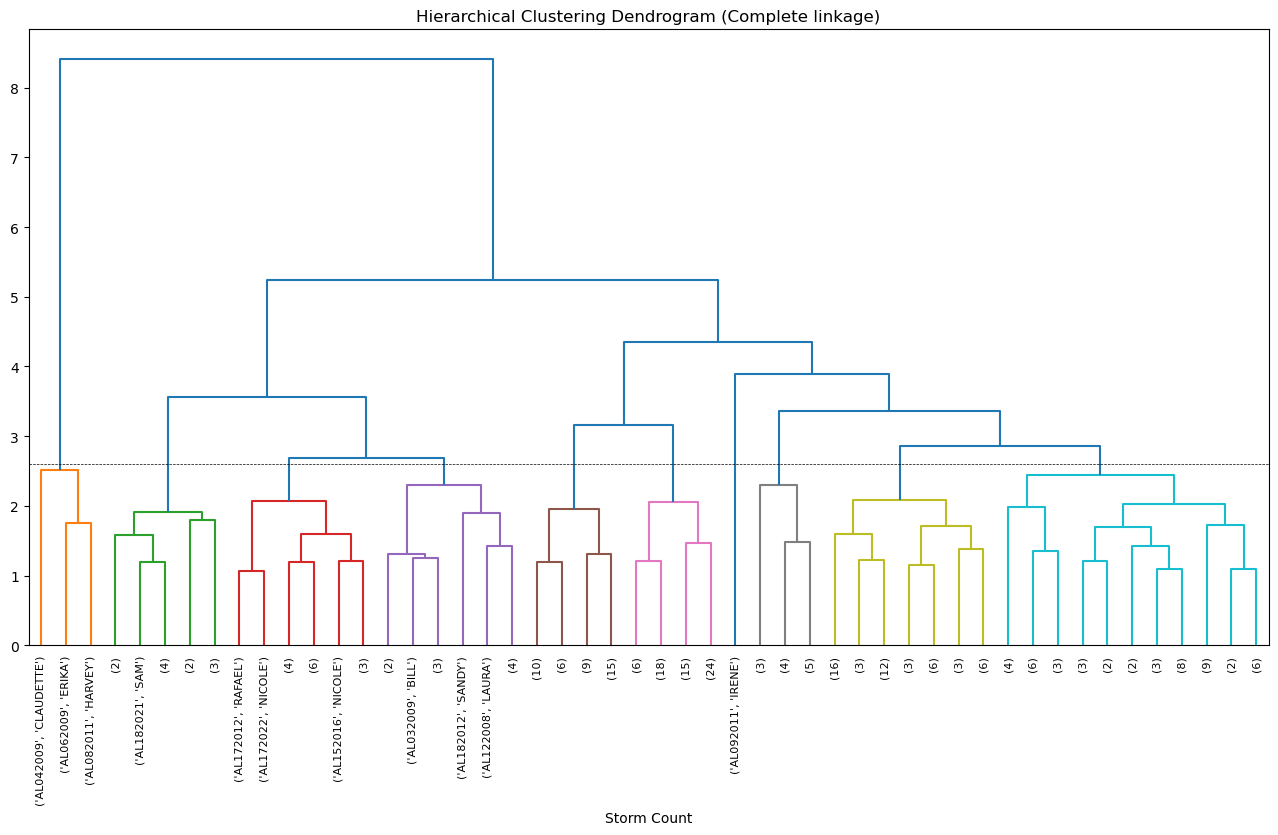

In [4]:
# Hurricanes v6 CSV was edited in Excel to come up with final data set Hurricanes v7
# Load Hurricanes v7 data set from CSV.  Define predictors for clustering, normalize predictors, and calculate means by ATCF and Name.
# Plot dendrogram with complete-linkages at threshhold of 2.6, resulting in 10 clusters, 8 with more than 2 storms.

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pylab as plt

data = pd.read_csv('c://print//hurricanes7.csv')
predictors = ['MaxWind','MinPressure','Elevation','Speed','Size34','Size50','Size64']
data_n = data.copy()
data_n[predictors] = (data_n[predictors] - data_n[predictors].mean())/data_n[predictors].std()
fields = predictors
fields.extend(['ATCF','Name'])
storms = data_n[fields].groupby(['ATCF','Name']).mean()
Z = linkage(storms, method='complete')
fig = plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Storm Count')
dendrogram(Z, p=50,truncate_mode='lastp',labels=storms.index, color_threshold=2.6)
plt.axhline(y=2.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [5]:
# Show centroids and counts of each cluster.

memb = fcluster(linkage(storms, 'complete'), 10, criterion='maxclust')
storms['cluster'] = memb
result = storms.groupby(['cluster']).mean()
result['Count']=storms.groupby(['cluster'])['MaxWind'].count()
result

MaxWind  MinPressure  Elevation     Speed    Size34    Size50  \
cluster                                                                   
1       -0.515926     0.674943   1.018609 -0.202920 -1.568498 -2.300842   
2        1.435356    -1.493319  -0.110894  0.221100  0.752908  0.890205   
3        0.367659    -0.464578  -0.396988 -0.045223  0.606631  0.389422   
4        0.495972    -0.766087  -0.270647  0.670819  1.300269  0.985430   
5       -0.612331     0.598469   1.201986 -0.162557 -0.609204 -0.394252   
6       -0.693642     0.740030  -0.587738 -0.231008 -0.676550 -0.432851   
7       -0.311589     0.405886  -0.063225  1.272299 -0.165597 -0.324324   
8       -0.134673     0.217339  -0.495742  0.086510 -0.002981 -0.144869   
9       -0.021124     0.073289   0.835170 -0.331300 -0.119721 -0.126741   
10       0.879780    -1.279757   1.136421  0.346404 -0.220464 -1.181732   

           Size64  Count  
cluster                   
1       -2.763631      3  
2        0.673398     12  
3        0.179621     16  
4        0.378707     12  
5       -0.168932     40  
6       -0.177396     63  
7       -0.172399     12  
8       -0.107786     49  
9       -0.068535     48  
10      -2.148943      1

In [6]:
# Show storms in cluster 2 with high MaxWind

storms[storms['cluster']==2]

MaxWind  MinPressure  Elevation     Speed    Size34  \
ATCF     Name                                                            
AL052019 DORIAN   1.451259    -1.305193   0.457023 -0.116386  0.331373   
AL072022 FIONA    0.831865    -1.007176   0.259630  0.181844  0.829181   
AL082014 GONZALO  1.370151    -1.204318  -0.271310  0.571696  0.370896   
AL092008 IKE      1.275524    -1.534429   0.338097  0.370282  0.636085   
AL112010 IGOR     1.299052    -1.771358  -0.574875  0.230630  1.329522   
AL112017 IRMA     2.114260    -2.158256   0.321825  0.018100  0.428692   
AL122021 LARRY    1.364665    -1.291201  -0.643966  0.625067  0.742000   
AL132019 LORENZO  1.352408    -1.474268  -0.297120  0.513844  1.363474   
AL142016 MATTHEW  2.136626    -1.848076   0.562400 -0.333759  0.730676   
AL152017 MARIA    1.332810    -1.430188  -0.253510  0.084927  0.741516   
AL182021 SAM      1.817622    -1.787238  -0.676662  0.345027  0.730518   
AL202020 TEDDY    0.878028    -1.108124  -0.552258  0.161931  0.800960   

                    Size50    Size64  cluster  
ATCF     Name                                  
AL052019 DORIAN   0.607113  0.509180        2  
AL072022 FIONA    0.555511  0.472390        2  
AL082014 GONZALO  0.608043  0.589612        2  
AL092008 IKE      0.983674  0.745511        2  
AL112010 IGOR     1.548683  1.000073        2  
AL112017 IRMA     0.697876  0.691744        2  
AL122021 LARRY    1.011515  0.788720        2  
AL132019 LORENZO  1.424572  0.836239        2  
AL142016 MATTHEW  0.802261  0.593674        2  
AL152017 MARIA    0.850959  0.603120        2  
AL182021 SAM      0.745202  0.538772        2  
AL202020 TEDDY    0.847056  0.711740        2

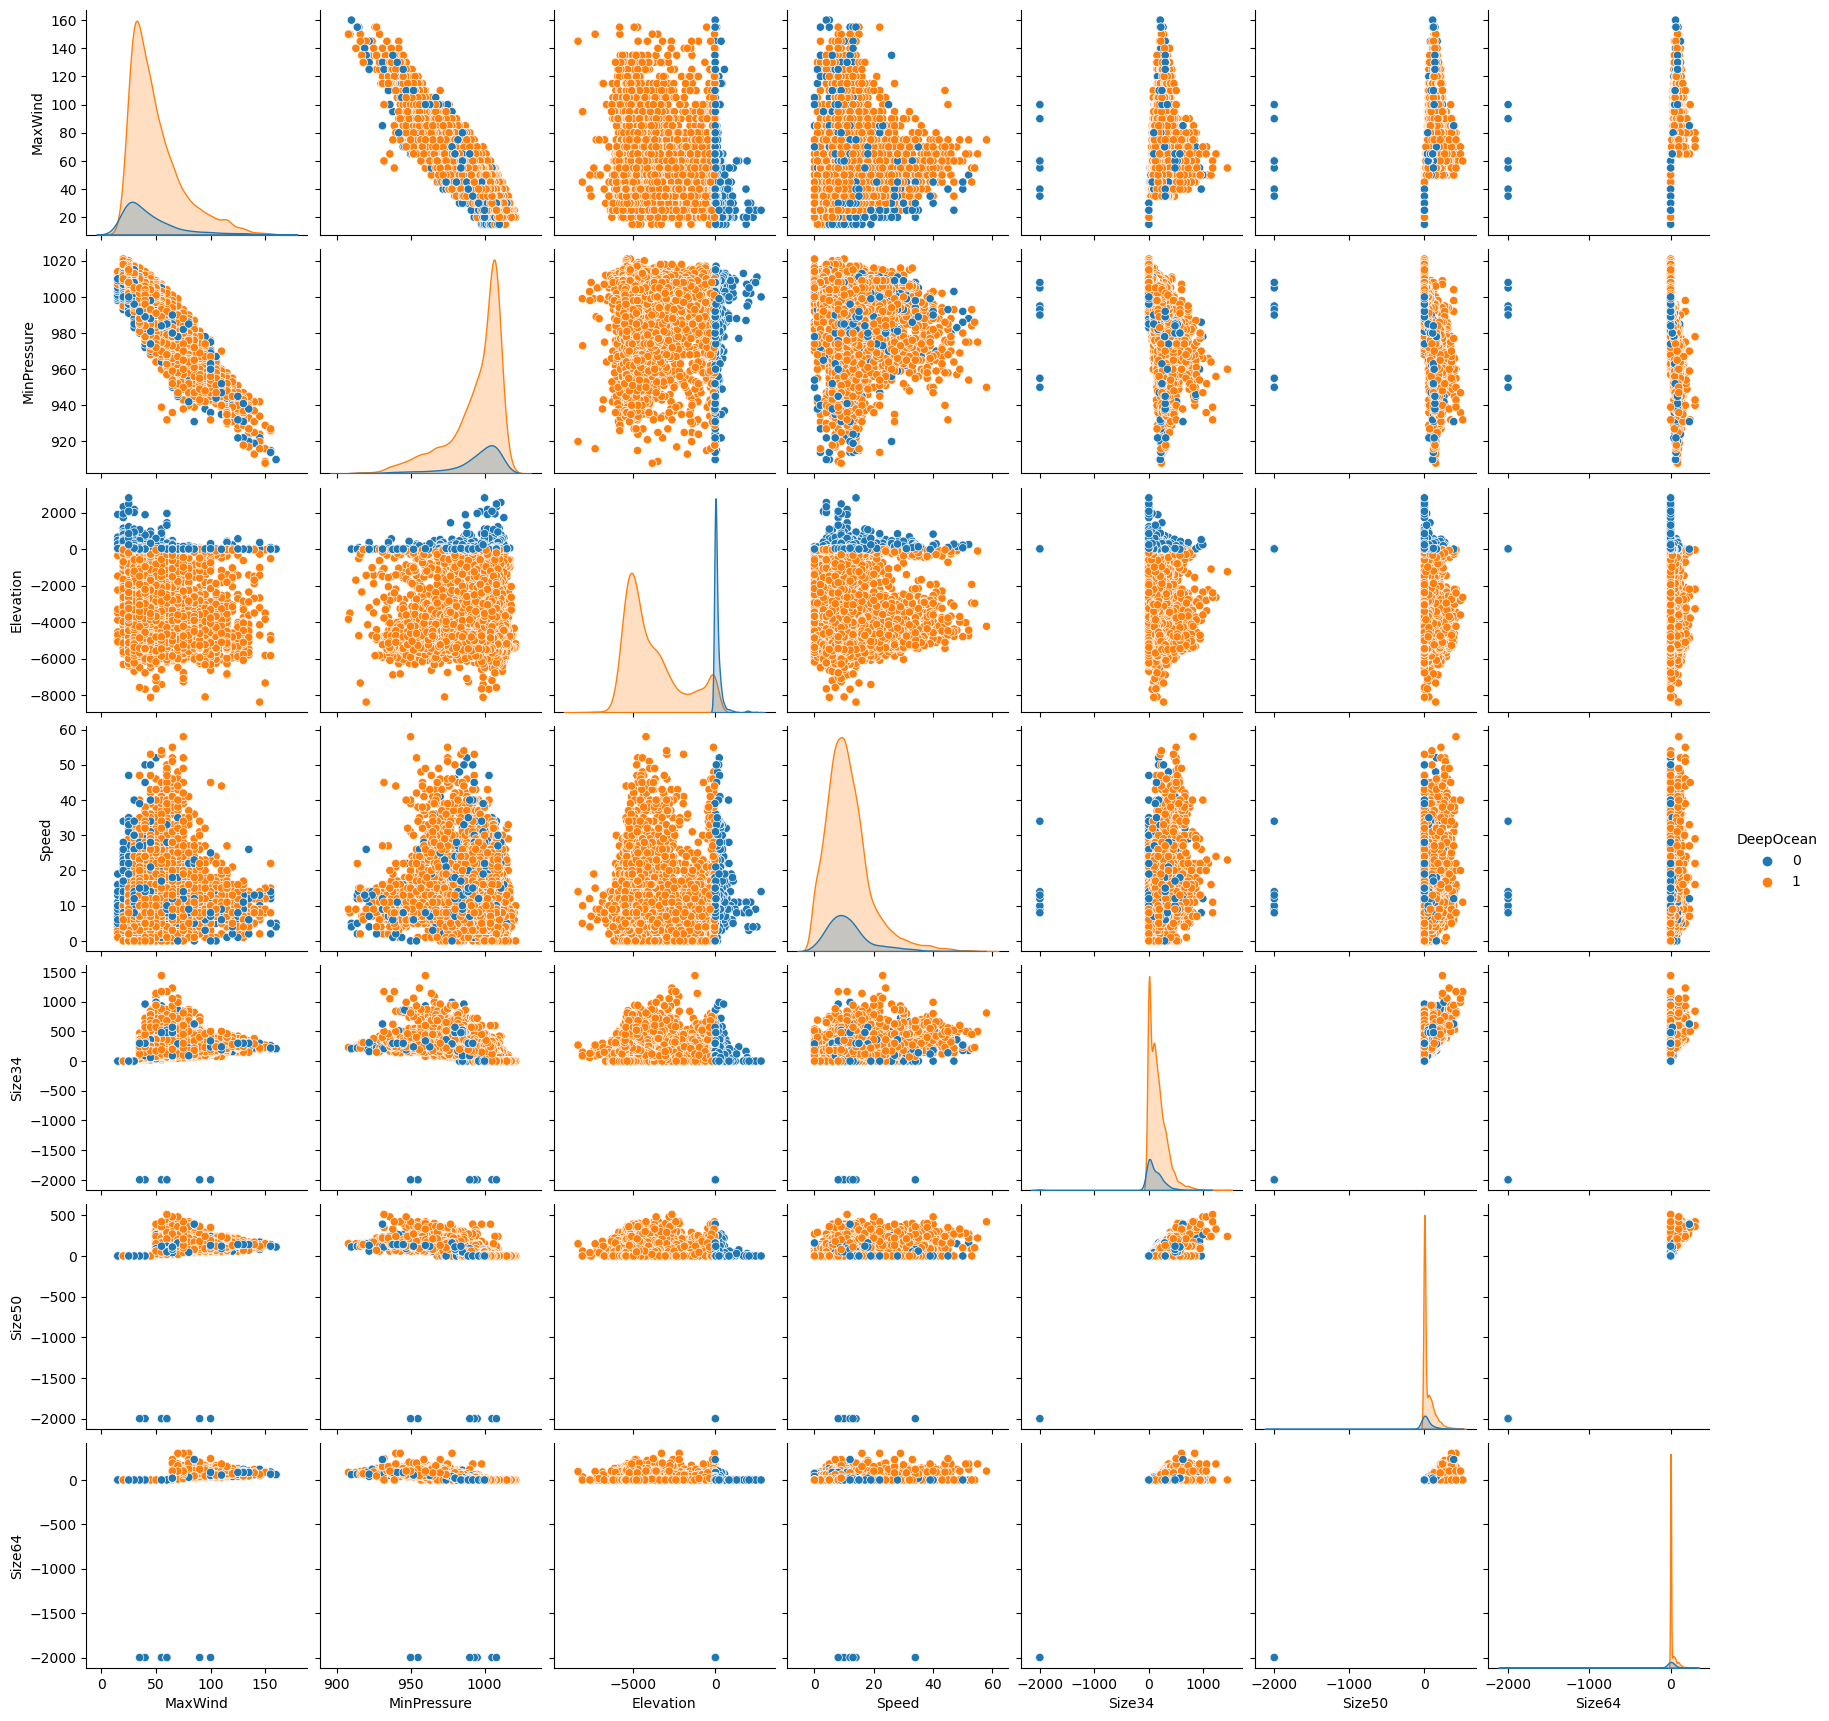

In [7]:
# Plot scatterplots matrix of 7 predictors grouped by DeepOcean

import seaborn as sns
predictors = ['MaxWind','MinPressure','Elevation','Speed','Size34','Size50','Size64']
fields = predictors
fields.append('DeepOcean')
corr = data.copy()
corr.set_index='RecordNum'
corr.drop(['ATCF','Name','NextWindHigher','NextWind'],axis=1)
sns.pairplot(corr[fields], hue='DeepOcean')

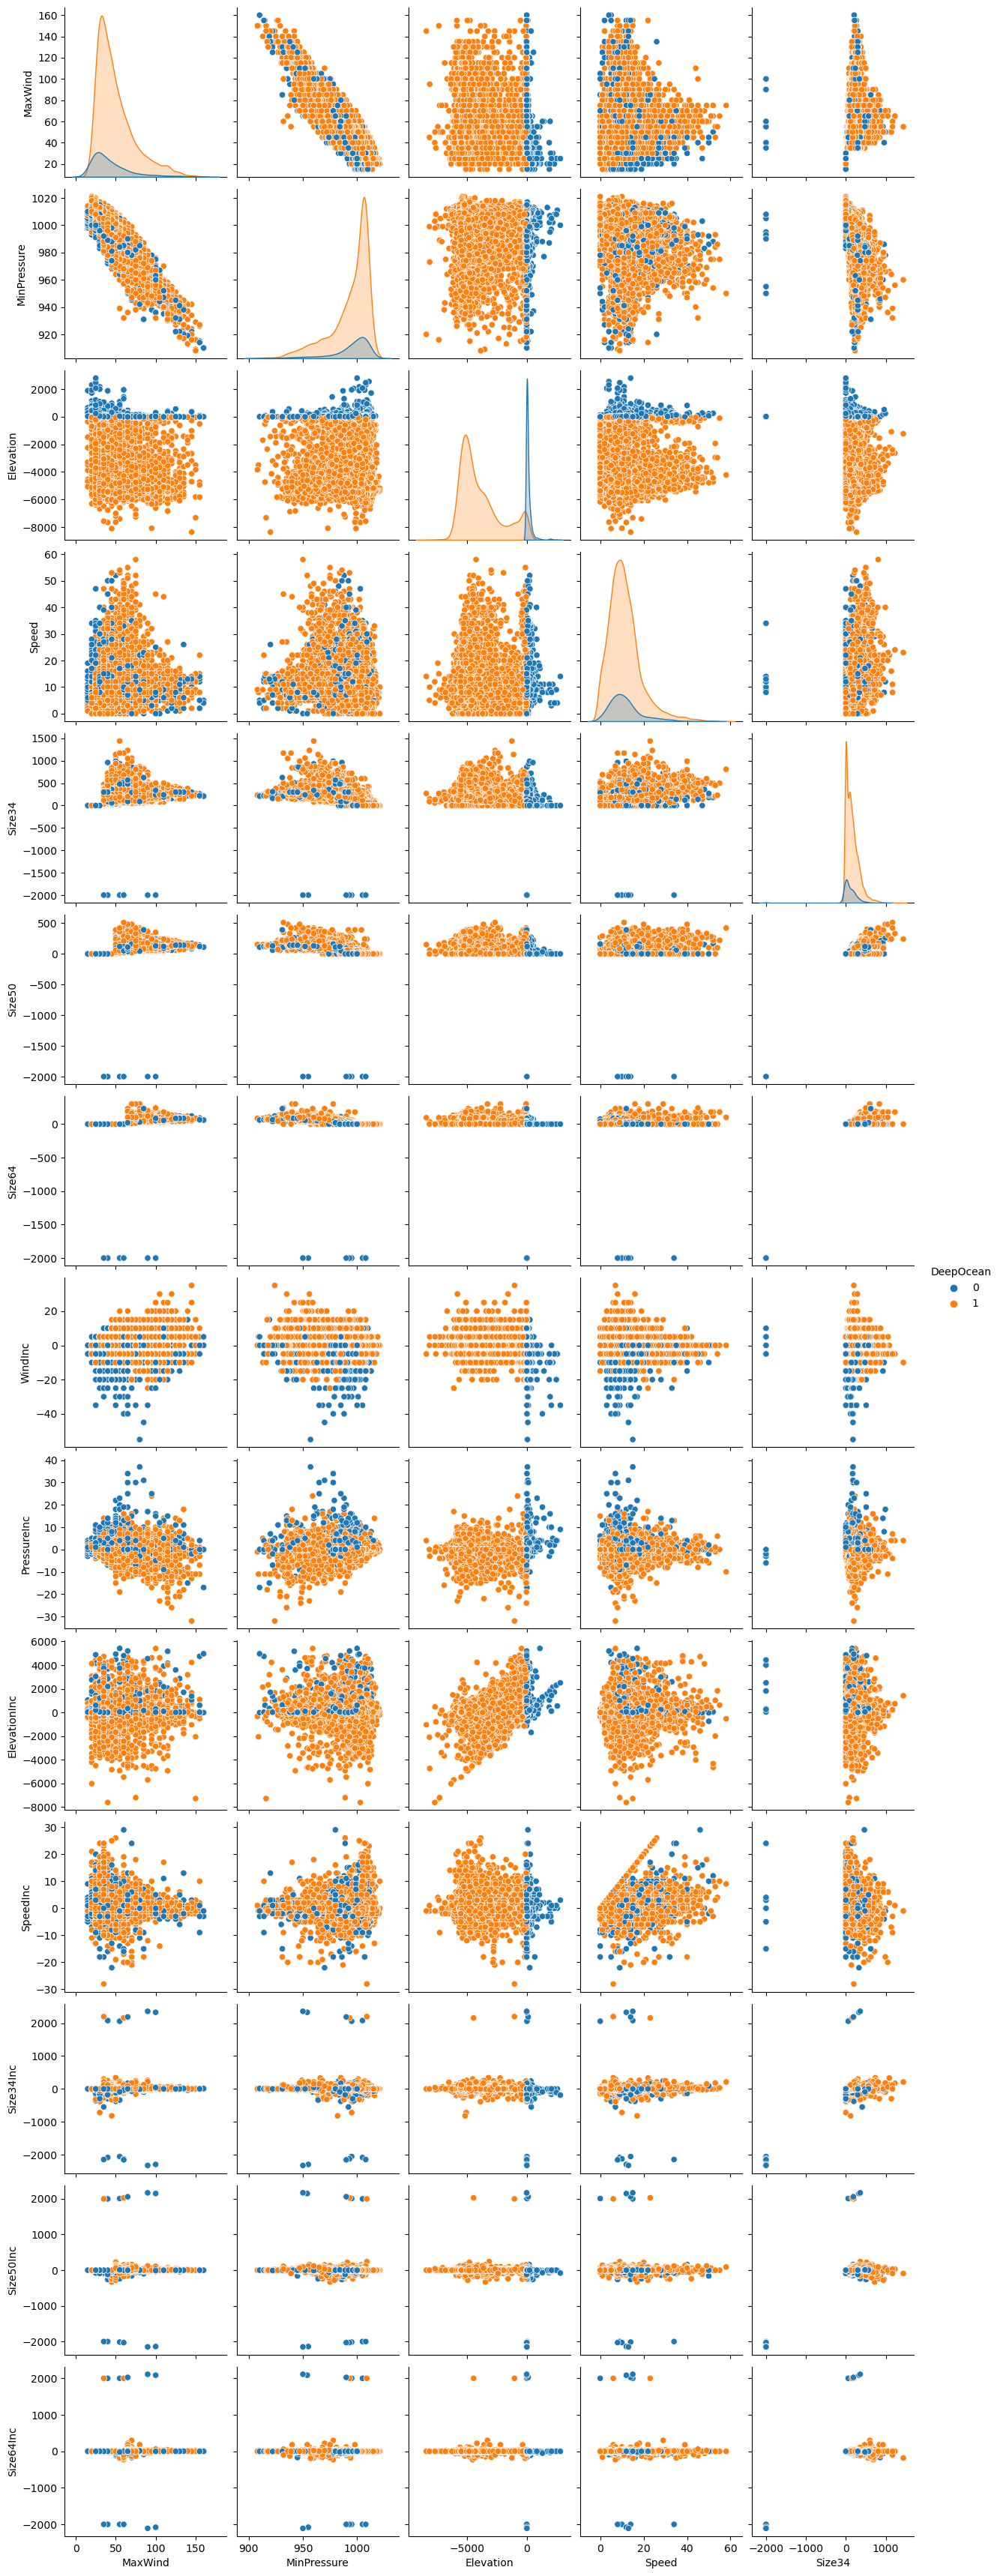

In [8]:
# Plot scatterplot matrix of first 5 predictors vs. 14 predictors grouped by DeepOcean

pred = ['MaxWind','MinPressure','Elevation','Speed','Size34','Size50','Size64', 'WindInc', 'PressureInc', 'ElevationInc', 'SpeedInc', 'Size34Inc','Size50Inc', 'Size64Inc']
sns.pairplot(data, x_vars=pred[0:5], y_vars=pred, hue='DeepOcean')

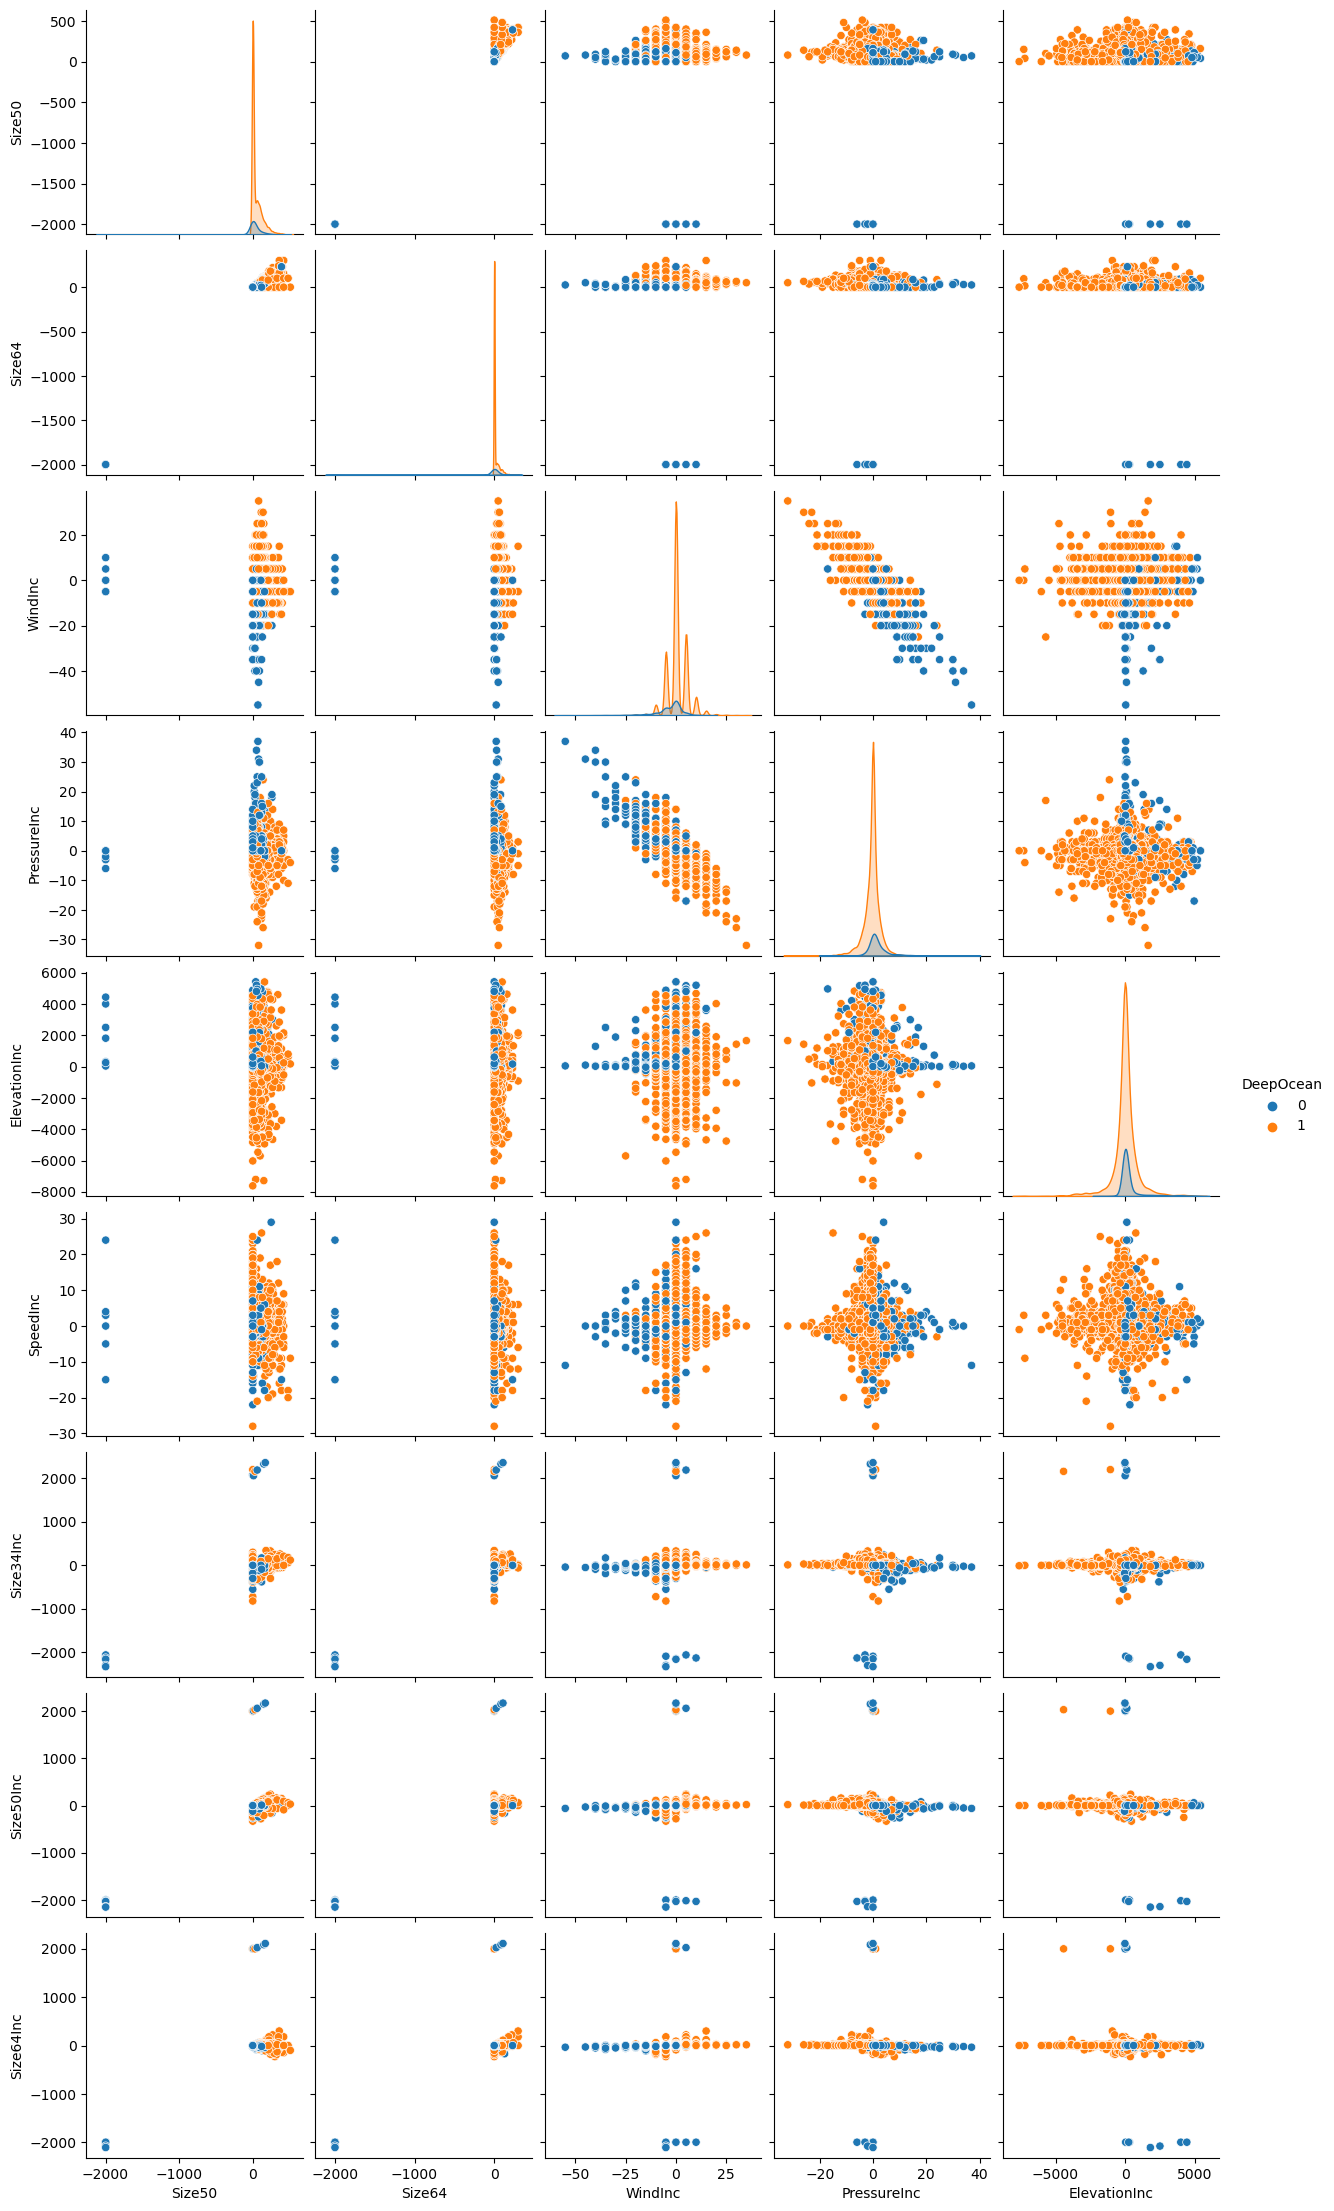

In [9]:
# Plot scatterplot matrix of next 5 predictors vs. 9 remaining predictors grouped by DeepOcean

sns.pairplot(data, x_vars=pred[5:10], y_vars=pred[5:], hue='DeepOcean')

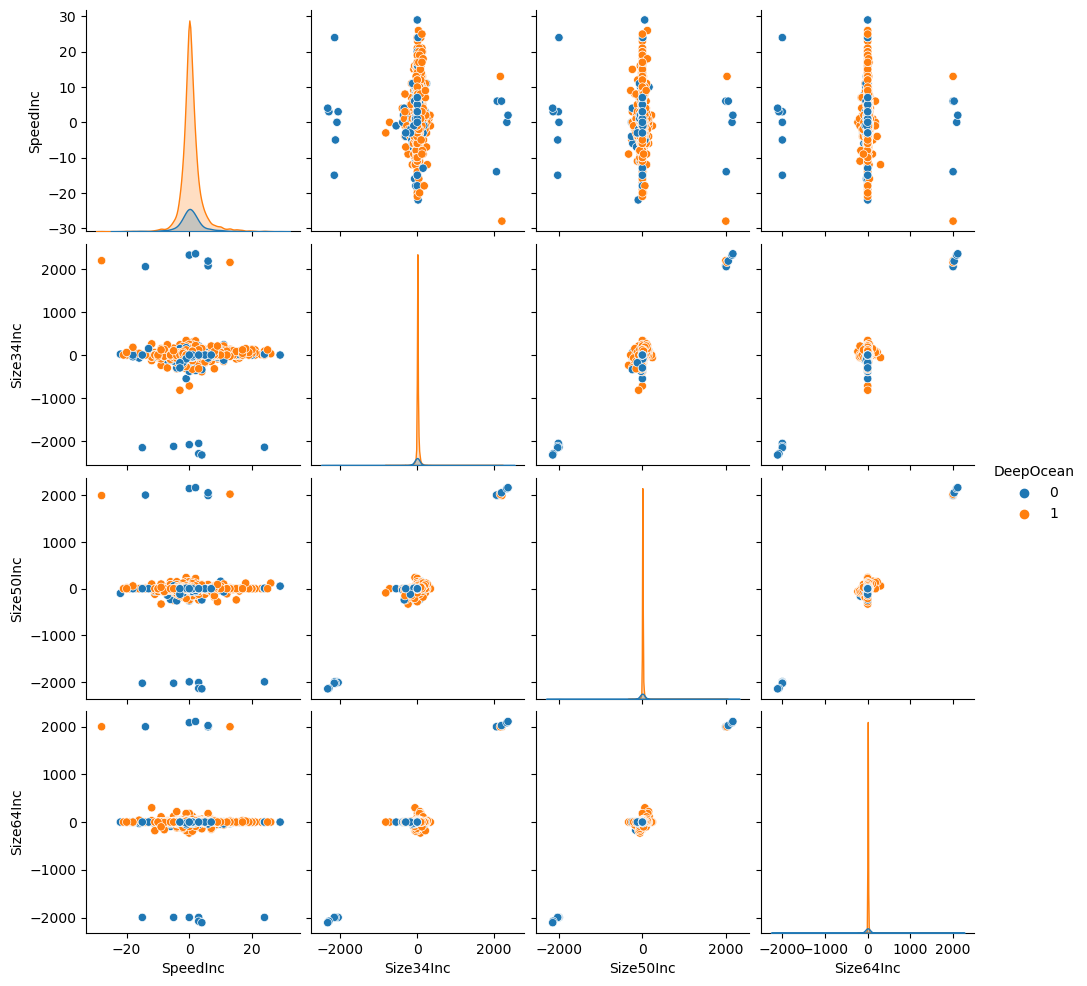

In [10]:
# Plot scatterplot matrix of final 4 predictors grouped by DeepOcean

sns.pairplot(data, x_vars=pred[10:], y_vars=pred[10:], hue='DeepOcean')

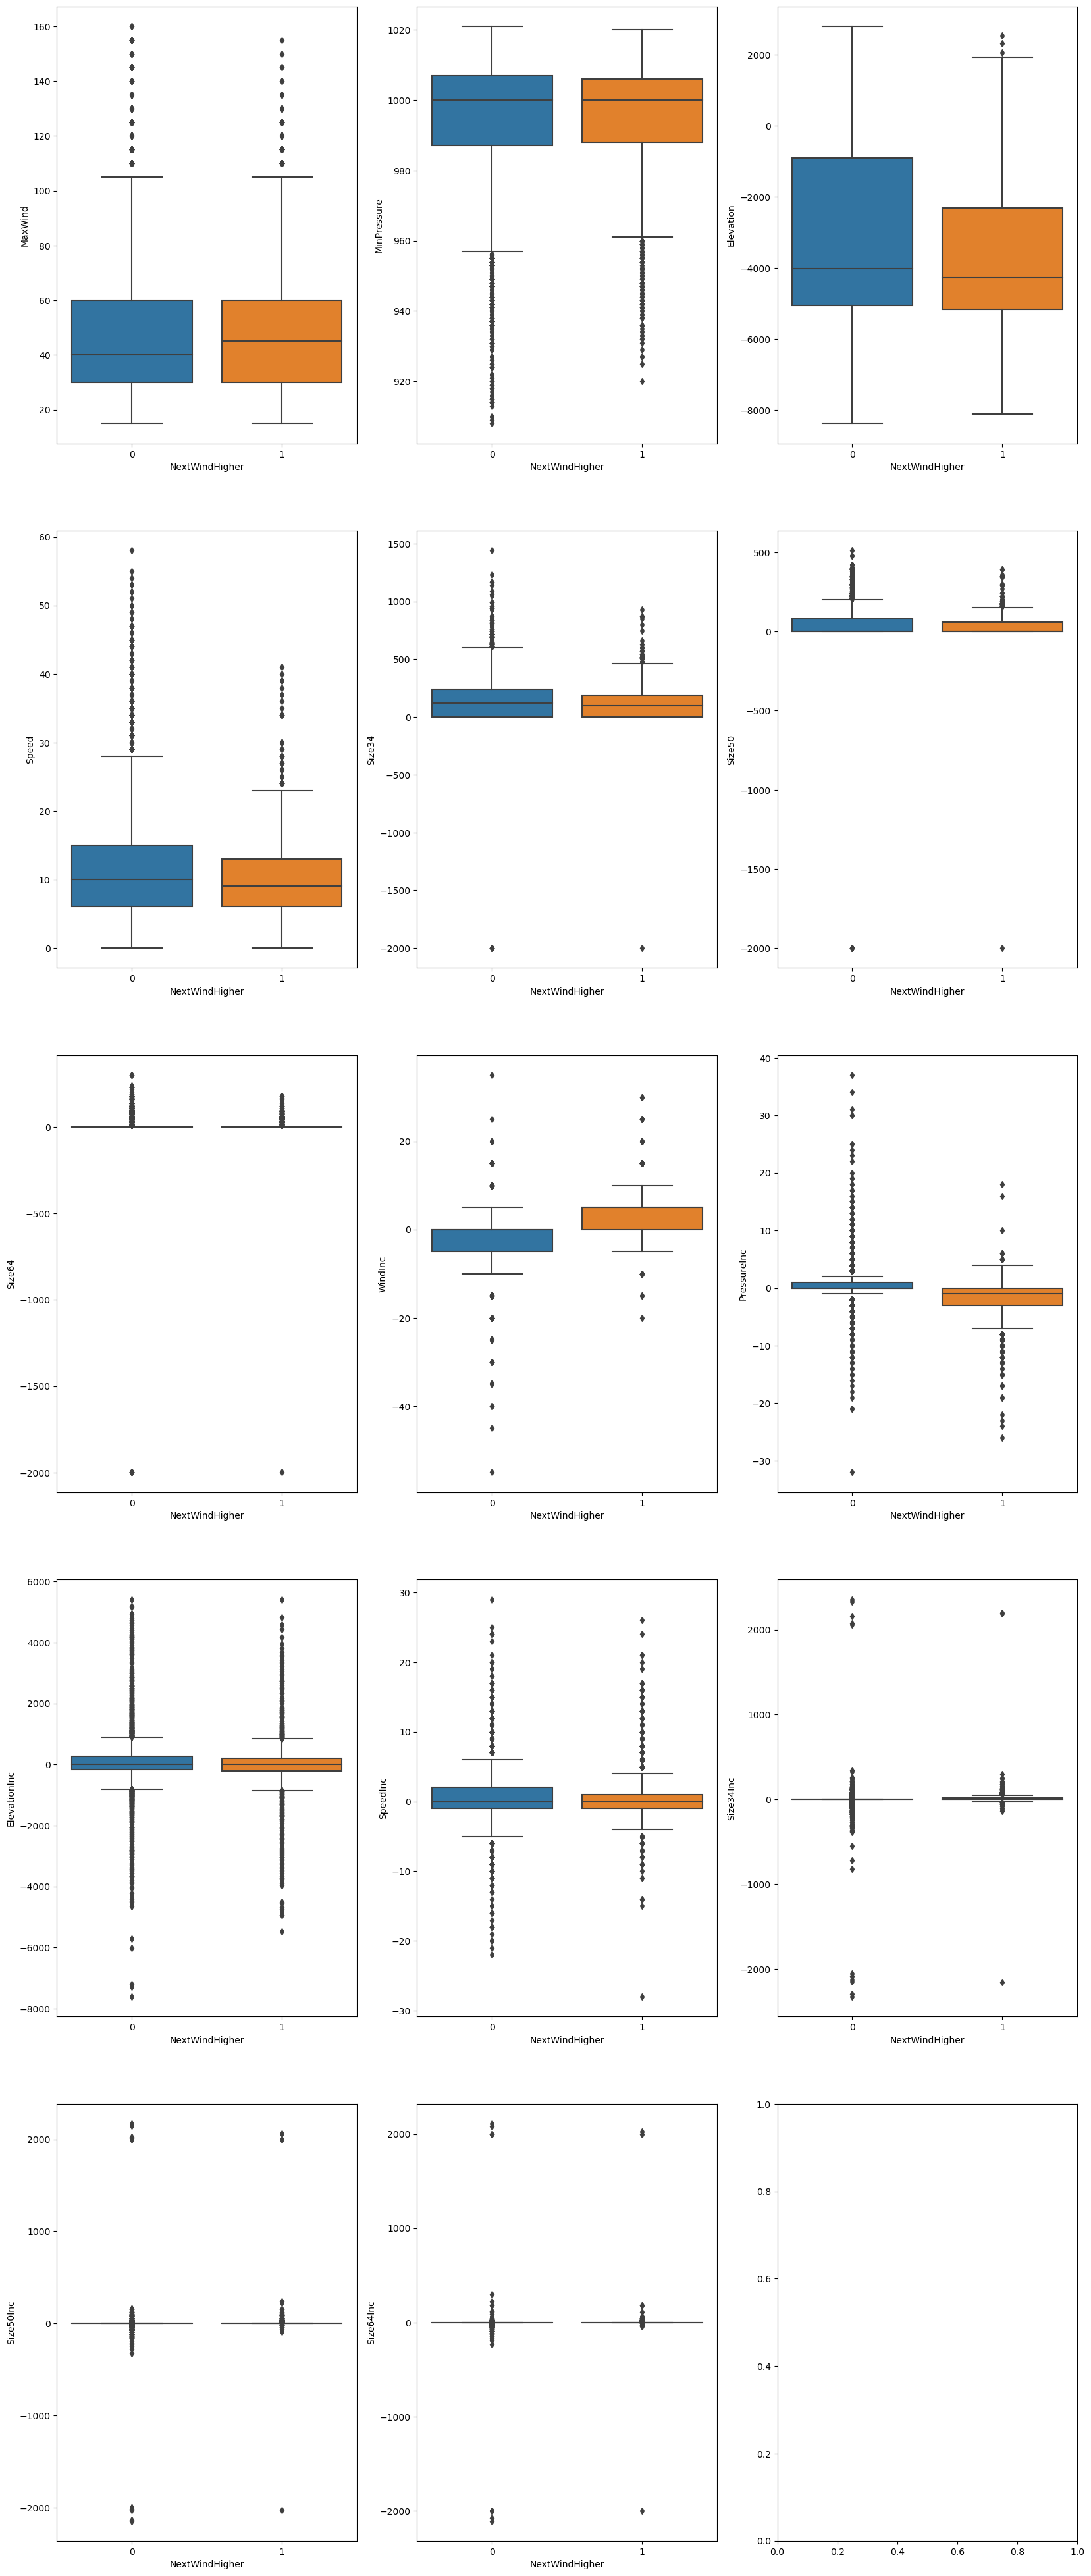

In [11]:
# Plot boxplots of 14 predictors grouped by NextWindHigher outcome 

f, axarray = plt.subplots(5, 3, figsize=(20,50))
for i in range(14):
    sns.boxplot(ax=axarray[i // 3, i % 3], data=data, x='NextWindHigher', y=pred[i])

In [12]:
# Correct outliers in 3 Size variables by averaging observations before and after and recalculate 3 SizeInc variables

data = pd.read_csv('c://print//hurricanes7.csv')
for index, row in data.iterrows():
    if abs(row['Size34Inc']) > 2000:
        if row['Size34'] < 0:
            data.loc[index,'Size34']=int(data.loc[index-1,'Size34']/2+data.loc[index+1,'Size34']/2)
            data.loc[index,'Size50']=int(data.loc[index-1,'Size50']/2+data.loc[index+1,'Size50']/2)
            data.loc[index,'Size64']=int(data.loc[index-1,'Size64']/2+data.loc[index+1,'Size64']/2)
        data.loc[index,'Size34Inc']=data.loc[index,'Size34'] - data.loc[index-1,'Size34']
        data.loc[index,'Size50Inc']=data.loc[index,'Size50'] - data.loc[index-1,'Size50']
        data.loc[index,'Size64Inc']=data.loc[index,'Size64'] - data.loc[index-1,'Size64']
        

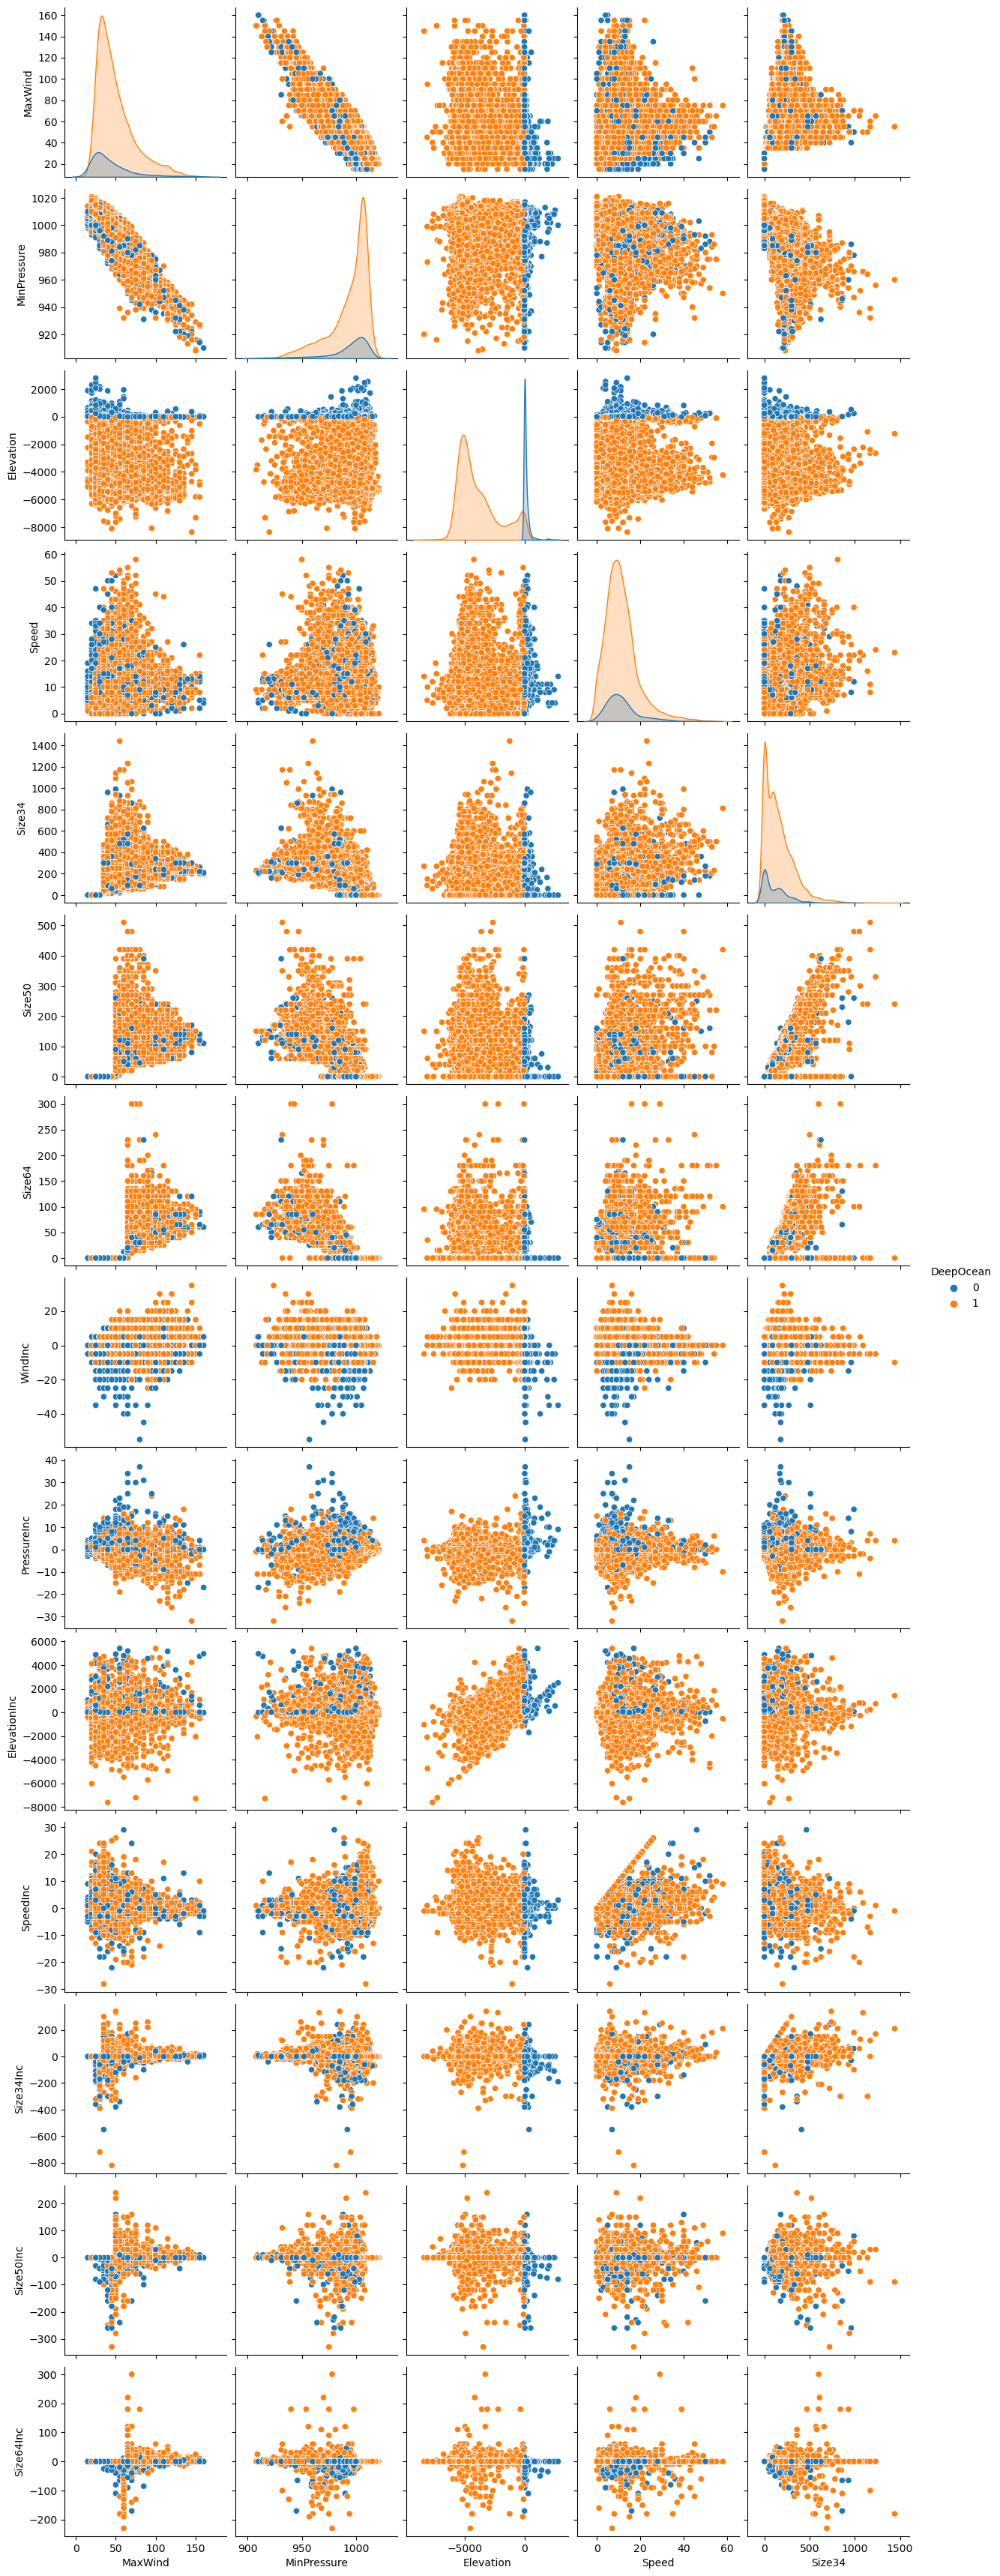

In [13]:
# Plot scatterplot matrix of first 5 predictors vs. 14 predictors grouped by DeepOcean without outliers

pred = ['MaxWind','MinPressure','Elevation','Speed','Size34','Size50','Size64', 'WindInc', 'PressureInc', 'ElevationInc', 'SpeedInc', 'Size34Inc','Size50Inc', 'Size64Inc']
sns.pairplot(data, x_vars=pred[0:5], y_vars=pred, hue='DeepOcean')

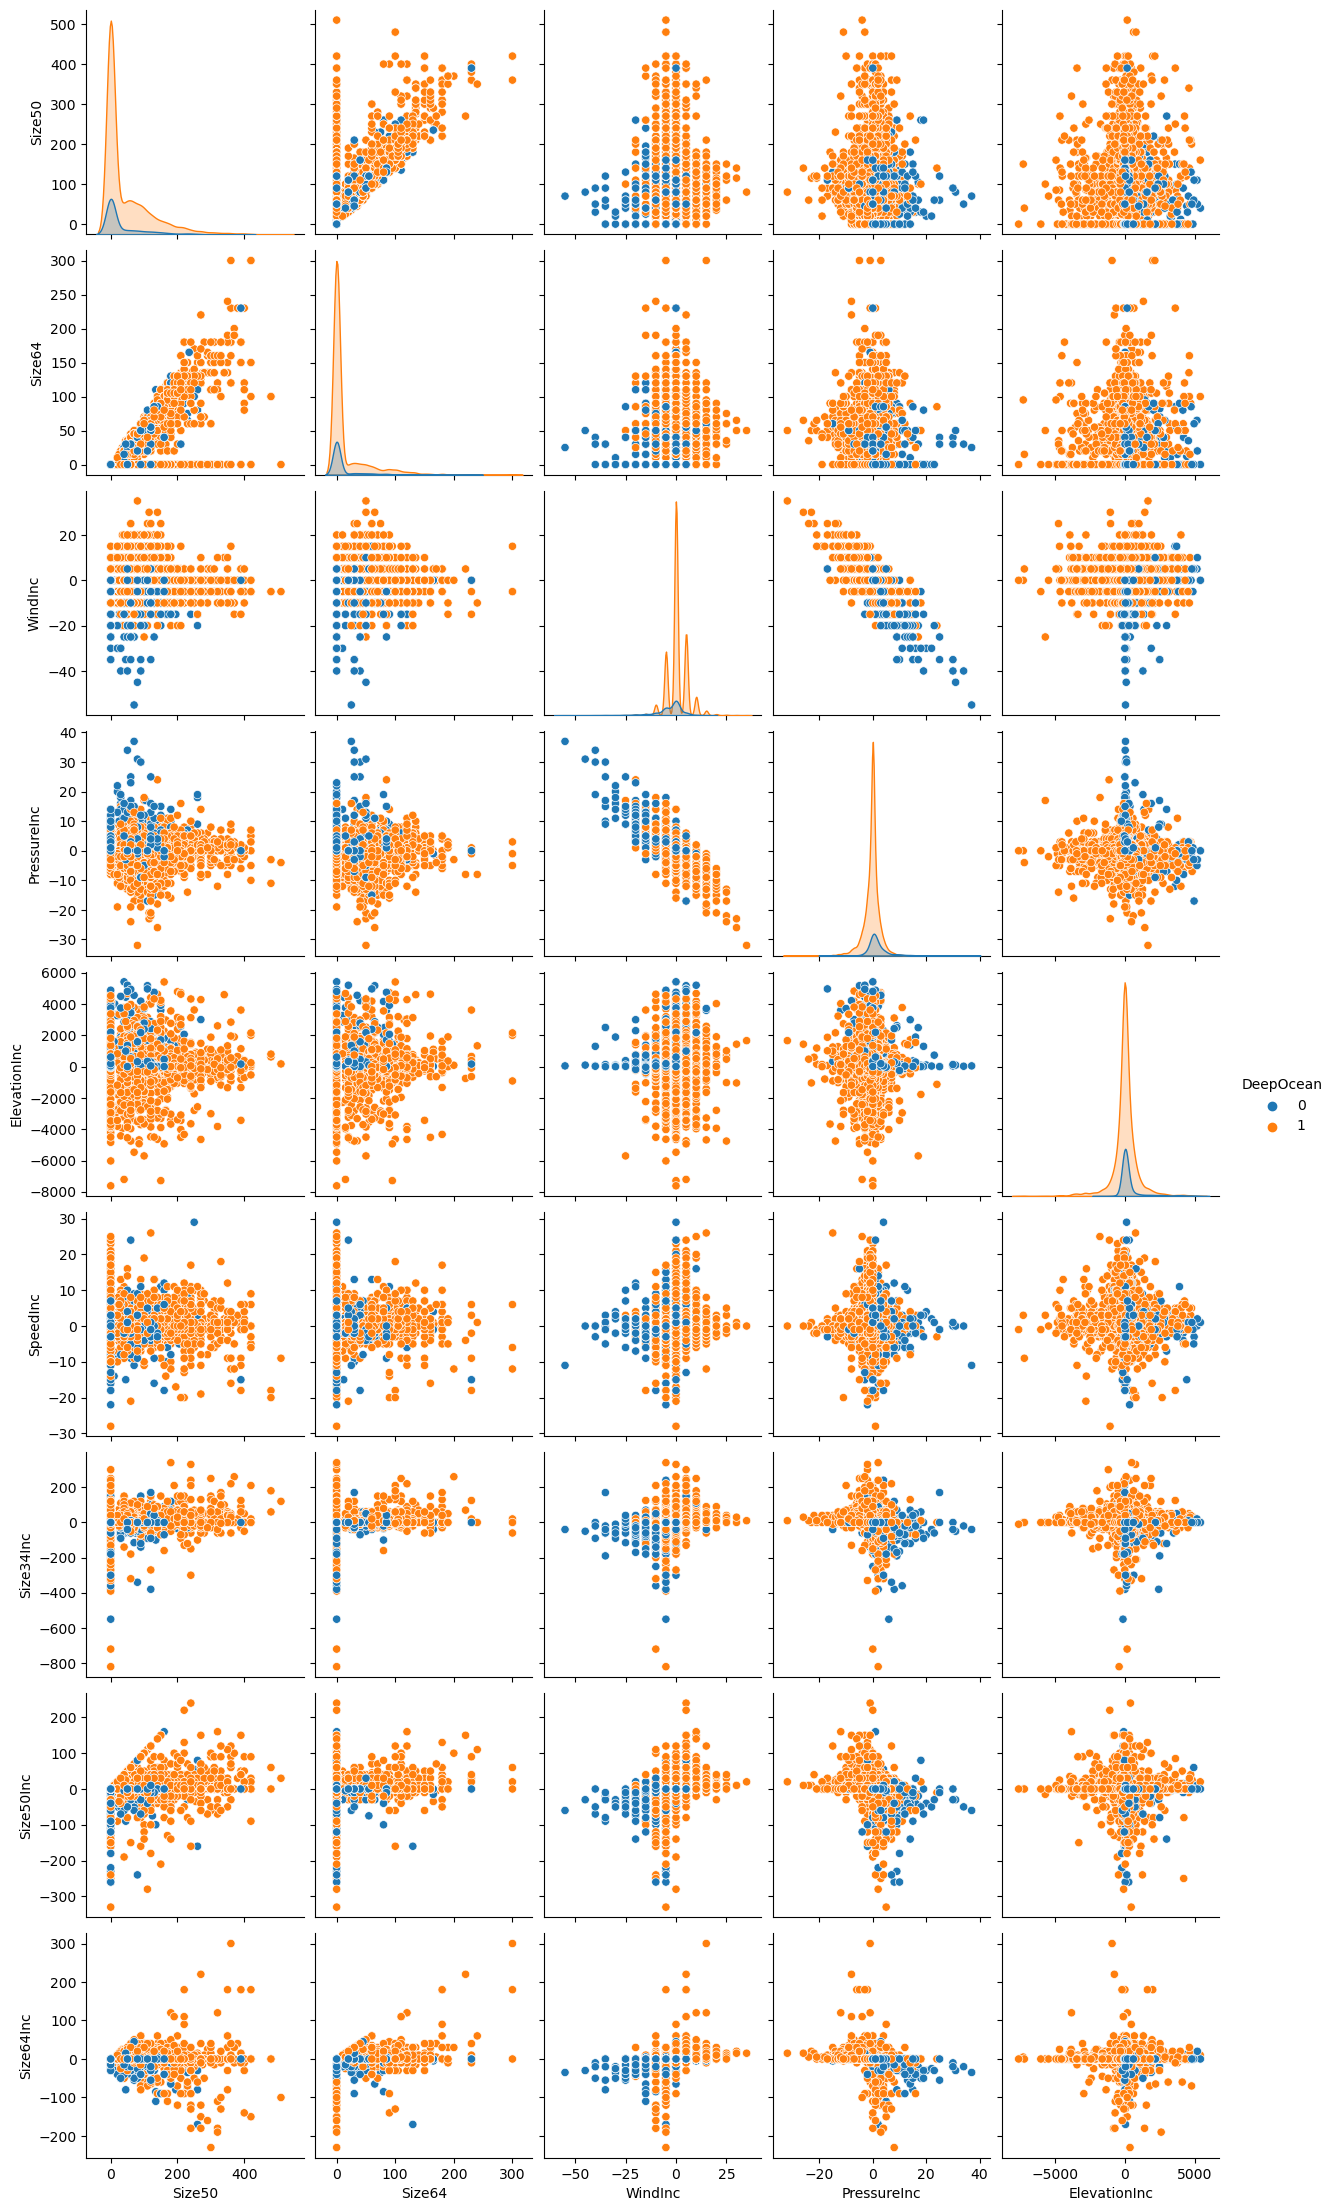

In [14]:
# Plot scatterplot matrix of next 5 predictors vs. 14 predictors grouped by DeepOcean without outliers

sns.pairplot(data, x_vars=pred[5:10], y_vars=pred[5:], hue='DeepOcean')


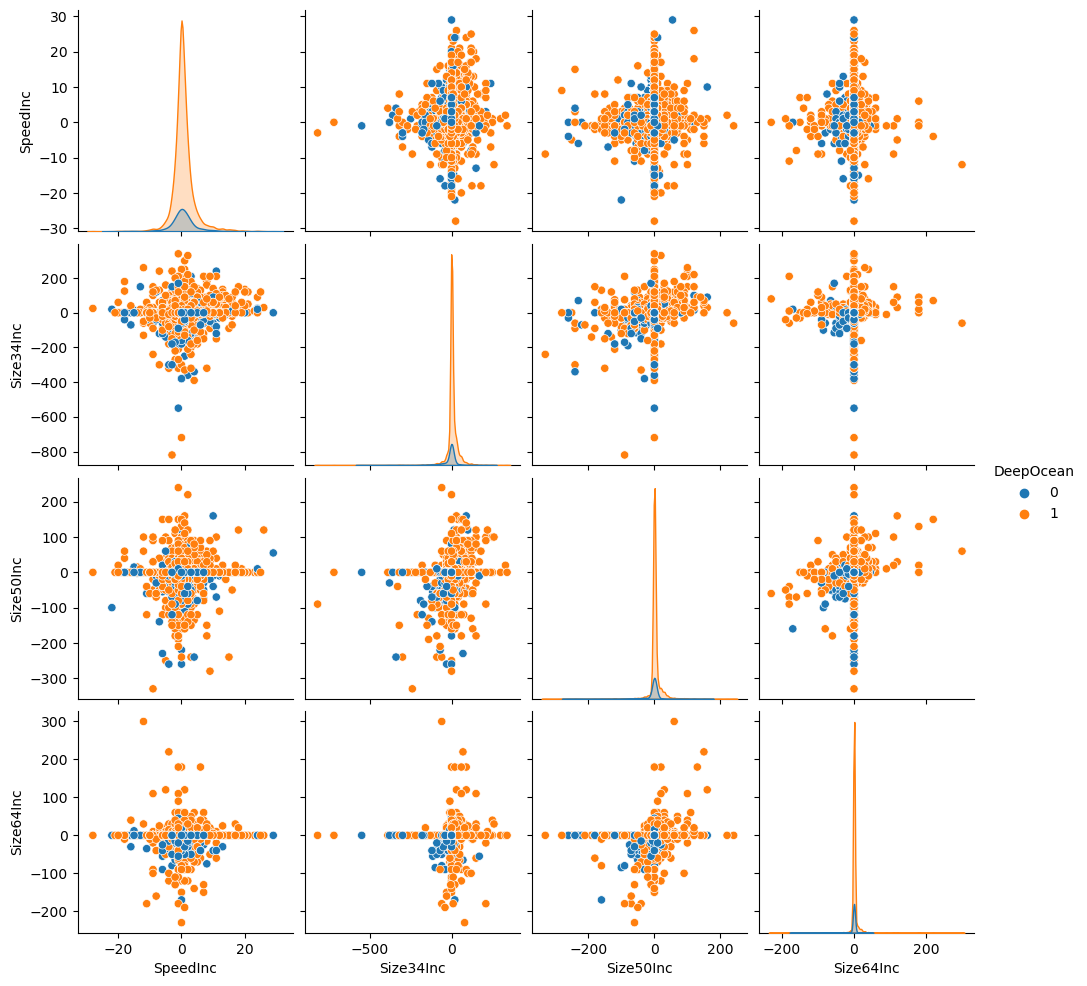

In [15]:
# Plot scatterplot matrix of final 4 predictors vs. 14 predictors grouped by DeepOcean wihtout outliers

sns.pairplot(data, x_vars=pred[10:], y_vars=pred[10:], hue='DeepOcean')

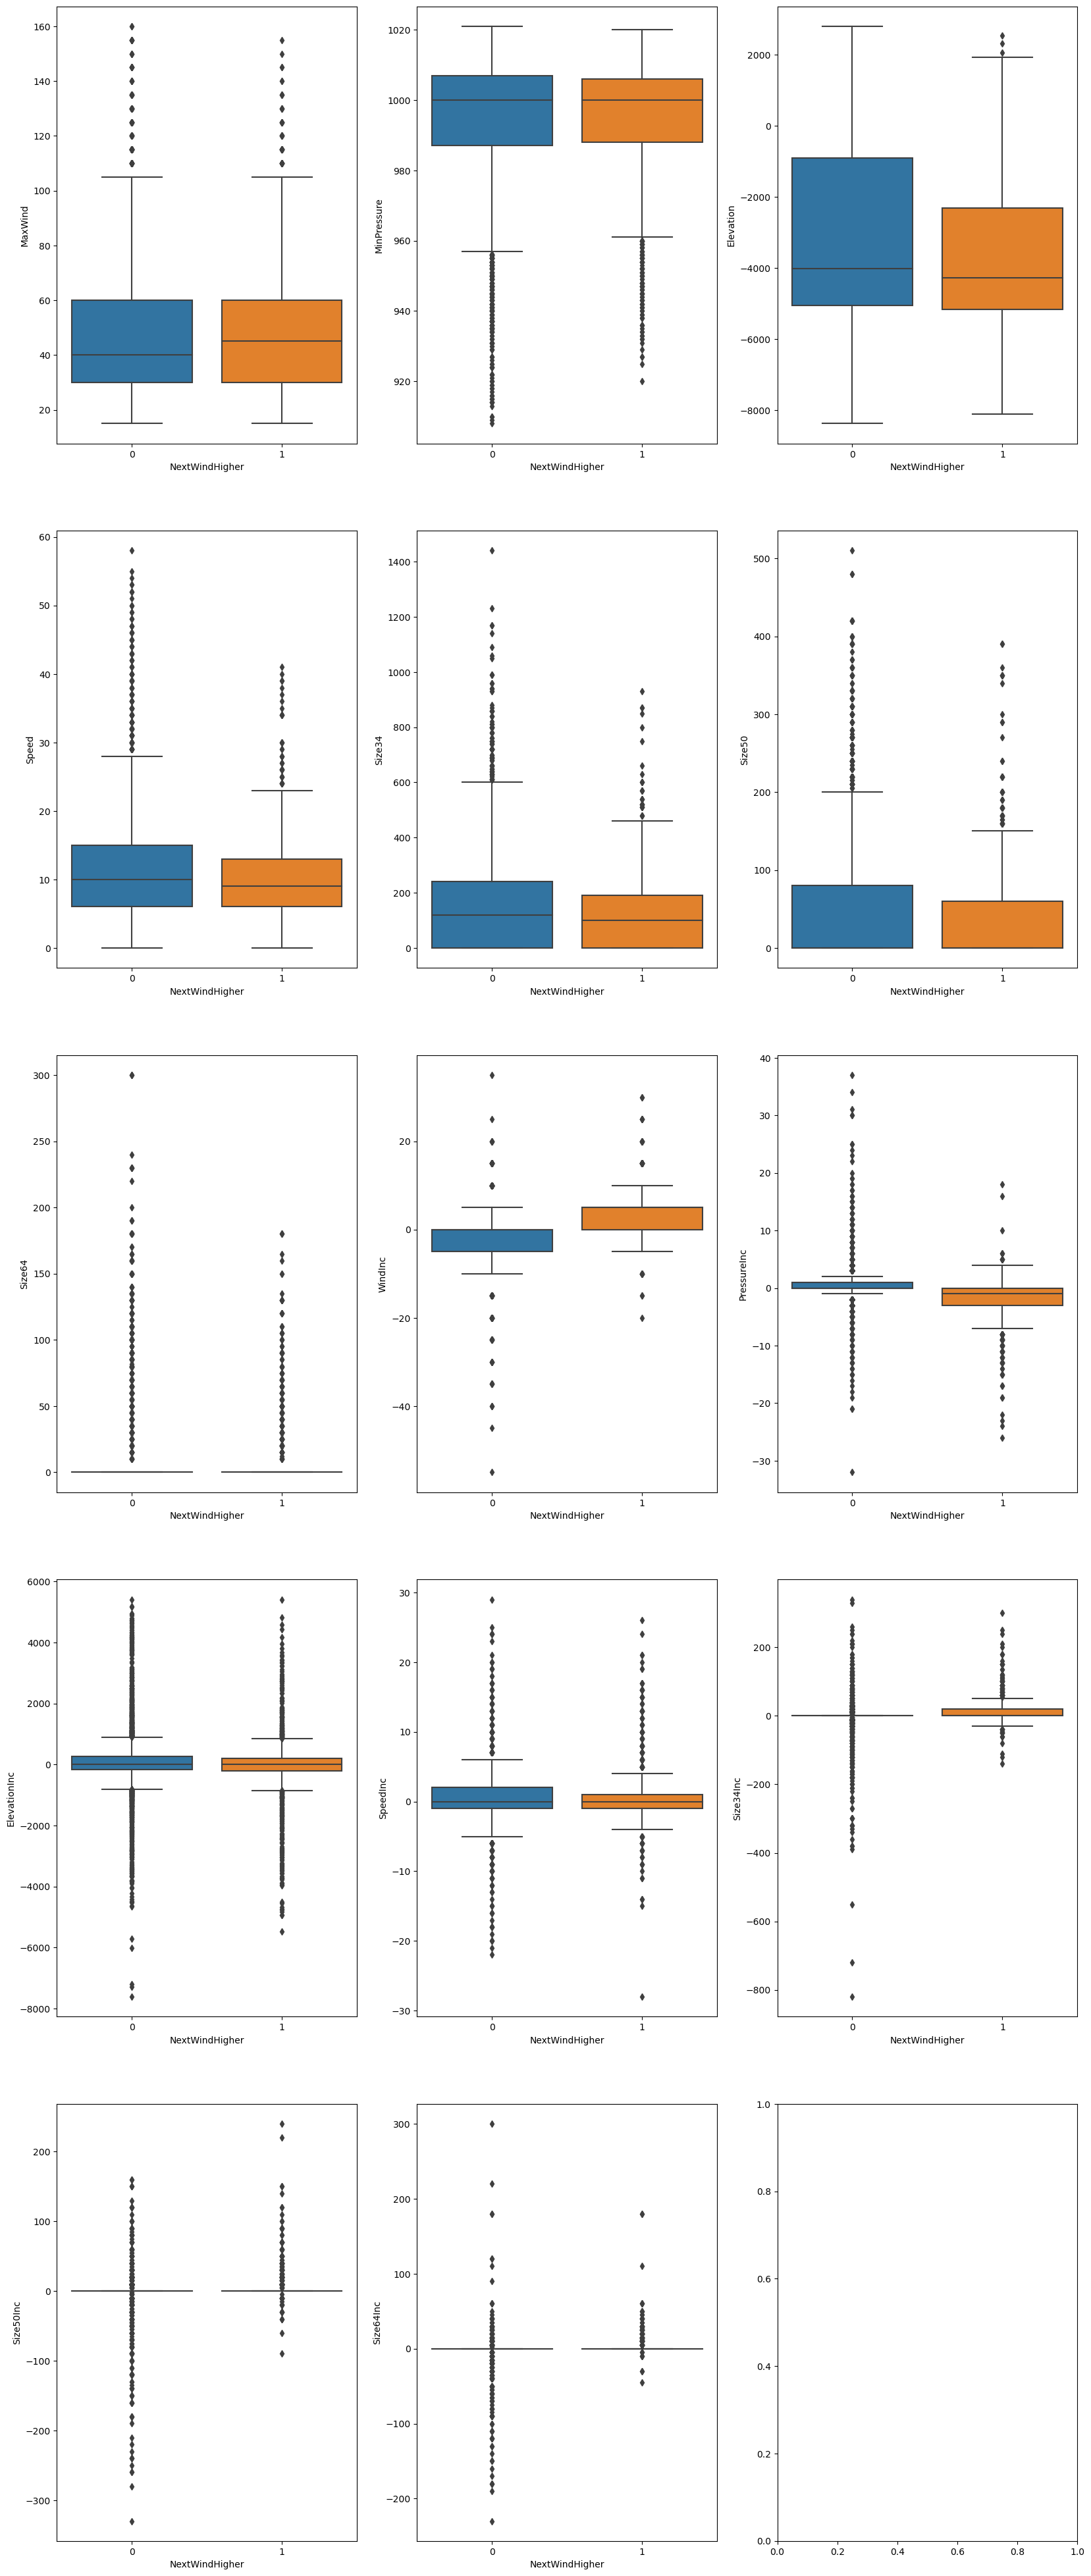

In [16]:
# Plot boxplots of 14 predictors grouped by NextWindHigher outcome without outliers

f, axarray = plt.subplots(5, 3, figsize=(20,50))
for i in range(14):
    sns.boxplot(ax=axarray[i // 3, i % 3], data=data, x='NextWindHigher', y=pred[i])

In [65]:
# Normalize numerical predictors from 0-1 for using in both knn and nn, split into x and y, and then into training and validation

from sklearn.model_selection import train_test_split

data_n = data.copy()
data_n[pred] = (data_n[pred] - data_n[pred].min())/(data_n[pred].max()-data_n[pred].min())
data_n = data_n.set_index('RecordNum')
x = data_n[pred]
y = data_n['NextWindHigher']
xt, xv, yt, yv = train_test_split(x, y, test_size=0.4, random_state=7)
print(xt.shape)
print(yt.shape)
print(xv.shape)
print(yv.shape)


(4635, 14)
(4635,)
(3091, 14)
(3091,)


In [58]:
# Build knn model with GridSearchCV on training partition, print best parameters and result

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

knn = KNeighborsClassifier()
pgrid = {'n_neighbors': np.arange(1, 70)}
knngscv = GridSearchCV(knn, pgrid, cv=5)
knngscv.fit(xt, yt)
print(knngscv.best_params_)
print(knngscv.best_score_)

{'n_neighbors': 21}
0.778856526429342


In [56]:
# Print confusion matrix, actual 0 %, and actual 1 accuracy for training and validation partitions.

from dmba import classificationSummary

classificationSummary(yt, knngscv.predict(xt))
print('Actual 0 %: ', (3268+173)/(4635))
print('Actual 1 Accuracy: ', 413/(413+781))
print()
classificationSummary(yv, knngscv.predict(xv))
print('Actual 0 %: ', (2160+136)/(3091))
print('Actual 1 Accuracy: ', 244/(244+551))


Confusion Matrix (Accuracy 0.7942)

       Prediction
Actual    0    1
     0 3268  173
     1  781  413
Actual 0 %:  0.7423948220064724
Actual 1 Accuracy:  0.3458961474036851

Confusion Matrix (Accuracy 0.7777)

       Prediction
Actual    0    1
     0 2160  136
     1  551  244
Actual 0 %:  0.7428016823034617
Actual 1 Accuracy:  0.3069182389937107


In [66]:
# Build nn model with GridSearchCV with 1 hidden layer on training partition, print best parameters and result

from sklearn.neural_network import MLPClassifier

pgrid = {'hidden_layer_sizes': [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True)
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)


{'hidden_layer_sizes': [7]}
0.7823085221143474


In [67]:
# Build nn model with GridSearchCV with 2 hidden layers on training partition, print best parameters and result

pgrid = {'hidden_layer_sizes': [[1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7], [8,8], [9,9], [10,10], [11,11], [12,12], [13,13], [14,14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True)
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)


{'hidden_layer_sizes': [4, 4]}
0.7833872707659115


C:\Users\Scott\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [68]:
# Print confusion matrix, actual 0 %, and actual 1 accuracy for training and validation partitions.

classificationSummary(yt, nngscv.predict(xt))
print('Actual 0 %: ', (3050+391)/(4635))
print('Actual 1 Accuracy: ', 633/(633+561))
print()
classificationSummary(yv, nngscv.predict(xv))
print('Actual 0 %: ', (1982+314)/(3091))
print('Actual 1 Accuracy: ', 398/(398+397))


Confusion Matrix (Accuracy 0.7946)

       Prediction
Actual    0    1
     0 3050  391
     1  561  633
Actual 0 %:  0.7423948220064724
Actual 1 Accuracy:  0.5301507537688442

Confusion Matrix (Accuracy 0.7700)

       Prediction
Actual    0    1
     0 1982  314
     1  397  398
Actual 0 %:  0.7428016823034617
Actual 1 Accuracy:  0.5006289308176101


C:\Users\Scott\AppData\Local\Temp\ipykernel_3304\1607294175.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


<Axes: >

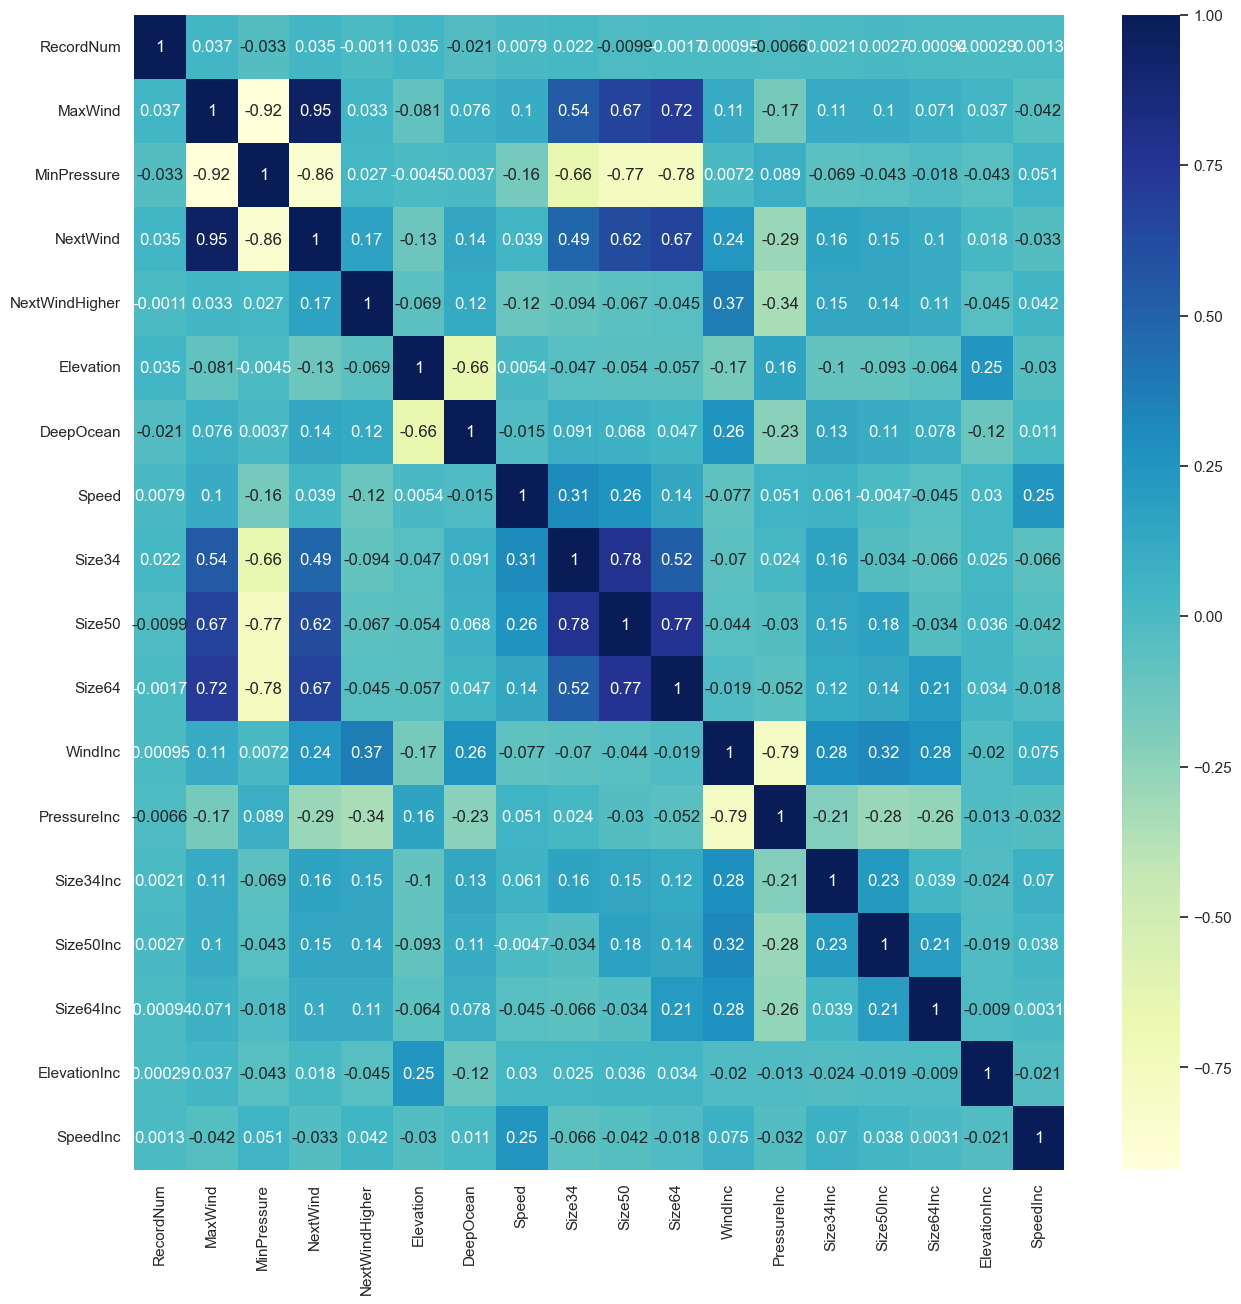

In [23]:
# Plot correlation heatmap

sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


In [24]:
# Print skew of each variable

data.skew()


C:\Users\Scott\AppData\Local\Temp\ipykernel_3304\3090825405.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


RecordNum         0.000000
MaxWind           1.439176
MinPressure      -1.537421
NextWind          1.137493
NextWindHigher    1.109747
Elevation         0.605737
DeepOcean        -2.076400
Speed             1.524978
Size34            1.673603
Size50            2.057986
Size64            2.864410
WindInc          -0.798106
PressureInc       0.420666
Size34Inc        -3.340546
Size50Inc        -2.863629
Size64Inc        -1.182086
ElevationInc     -0.022903
SpeedInc          1.021477
dtype: float64

In [25]:
# Log transform predictors with high skew and print transformed skews

logt = ['MaxWind','MinPressure','Elevation','Speed','Size34','Size50','Size64','WindInc','Size34Inc', 'Size50Inc', 'Size64Inc','SpeedInc']
data_t = data.copy()
data_t[logt] = np.log(data_t[logt] - data_t[logt].min() +1)
data_t[logt].skew()


MaxWind        -0.592685
MinPressure    -3.546252
Elevation      -0.928548
Speed          -1.089923
Size34         -0.746690
Size50          0.532754
Size64          1.464455
WindInc        -7.861587
Size34Inc     -49.342053
Size50Inc     -24.983069
Size64Inc     -30.244835
SpeedInc       -3.479157
dtype: float64

In [26]:
# Recalculate Inc variables using division instead of subtraction and print skew, assign increase from 0 as 10

data_r = data.copy()
predinc = [['WindInc','MaxWind'], ['PressureInc', 'MinPressure'], ['Size34Inc', 'Size34'], ['Size50Inc', 'Size50'], ['Size64Inc', 'Size64'], ['ElevationInc', 'Elevation'], ['SpeedInc', 'Speed']]
for index, row in data_r.iterrows():
    for i in predinc:  
        if row[i[0]] != 0:
            if data_r.loc[index-1,i[1]] != 0:
                data_r.loc[index,i[0]]=data_r.loc[index,i[1]]/data_r.loc[index-1,i[1]]
            else:
                row[i[0]] = 10
        else:
            row[i[0]] = 1
data_r.skew()


C:\Users\Scott\AppData\Local\Temp\ipykernel_3304\2930525888.py:14: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_r.skew()


RecordNum          0.000000
MaxWind            1.439176
MinPressure       -1.537421
NextWind           1.137493
NextWindHigher     1.109747
Elevation          0.605737
DeepOcean         -2.076400
Speed              1.524978
Size34             1.673603
Size50             2.057986
Size64             2.864410
WindInc            0.242797
PressureInc       -0.644543
Size34Inc          9.053526
Size50Inc         10.734649
Size64Inc         23.868403
ElevationInc     -29.520806
SpeedInc           6.181726
dtype: float64

In [27]:
# Log transform predictors with high skew and print transformed skews

logt = ['MaxWind','MinPressure','Elevation','Speed','Size34','Size50','Size64','PressureInc','Size34Inc', 'Size50Inc', 'Size64Inc','ElevationInc','SpeedInc']
data_t = data_r.copy()
data_t[logt] = np.log(data_t[logt] - data_t[logt].min() +1)
data_t[logt].skew()


MaxWind         -0.592685
MinPressure     -3.546252
Elevation       -0.928548
Speed           -1.089923
Size34          -0.746690
Size50           0.532754
Size64           1.464455
PressureInc     -0.644626
Size34Inc        3.944029
Size50Inc        4.525069
Size64Inc        5.782850
ElevationInc   -82.016660
SpeedInc         1.539258
dtype: float64

In [28]:
# Log transform only predictors for which transformation decreases skew 

predt = ['MaxWind', 'Speed', 'Size34', 'Size50', 'Size64', 'Size34Inc', 'Size50Inc', 'Size64Inc', 'SpeedInc']
data_t = data_r.copy()
data_t[predt] = np.log(data_t[predt] - data_t[predt].min() +1)
data_t[pred].skew()


MaxWind         -0.592685
MinPressure     -1.537421
Elevation        0.605737
Speed           -1.089923
Size34          -0.746690
Size50           0.532754
Size64           1.464455
WindInc          0.242797
PressureInc     -0.644543
ElevationInc   -29.520806
SpeedInc         1.539258
Size34Inc        3.944029
Size50Inc        4.525069
Size64Inc        5.782850
dtype: float64

In [29]:
# Repeat with transformed data: Normalize numerical predictors from 0-1 for using in both knn and nn, split into x and y, and then into training and validation

from sklearn.model_selection import train_test_split

data_n = data_t.copy()
data_n[pred] = (data_n[pred] - data_n[pred].min())/(data_n[pred].max()-data_n[pred].min())
data_n = data_n.set_index('RecordNum')
x = data_n[pred]
y = data_n['NextWindHigher']
xt, xv, yt, yv = train_test_split(x, y, test_size=0.4, random_state=7)
print(xt.shape)
print(yt.shape)
print(xv.shape)
print(yv.shape)



(4635, 14)
(4635,)
(3091, 14)
(3091,)


In [30]:
# Repat with transformed data: Build knn model with GridSearchCV on training partition, print best parameters and result

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

knn = KNeighborsClassifier()
pgrid = {'n_neighbors': np.arange(1, 70)}
knngscv = GridSearchCV(knn, pgrid, cv=5)
knngscv.fit(xt, yt)
print(knngscv.best_params_)
print(knngscv.best_score_)

{'n_neighbors': 33}
0.7758360302049623


In [31]:
# Repat with transformed data: Print confusion matrix, actual 0 %, and actual 1 accuracy for training and validation partitions.

from dmba import classificationSummary

classificationSummary(yt, knngscv.predict(xt))
print('Actual 0 %: ', (3344+144)/(4635))
print('Actual 1 Accuracy: ', 293/(293+855))
print()
classificationSummary(yv, knngscv.predict(xv))
print('Actual 0 %: ', (2143+107)/(3091))
print('Actual 1 Accuracy: ', 223/(223+618))


Confusion Matrix (Accuracy 0.7810)

       Prediction
Actual    0    1
     0 3237  204
     1  811  383
Actual 0 %:  0.7525350593311758
Actual 1 Accuracy:  0.25522648083623695

Confusion Matrix (Accuracy 0.7697)

       Prediction
Actual    0    1
     0 2144  152
     1  560  235
Actual 0 %:  0.7279197670656745
Actual 1 Accuracy:  0.26516052318668254


In [32]:
# Repeat with transformed data: Build nn model with GridSearchCV with 1 hidden layer on training partition, print best parameters and result

from sklearn.neural_network import MLPClassifier

pgrid = {'hidden_layer_sizes': [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True)
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [2]}
0.780151024811219


In [33]:
# Repeat with transformed data: Build nn model with GridSearchCV with 2 hidden layers on training partition, print best parameters and result

pgrid = {'hidden_layer_sizes': [[1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7], [8,8], [9,9], [10,10], [11,11], [12,12], [13,13], [14,14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True)
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [3, 3]}
0.7807982740021575


In [34]:
# Repeat with transformed data: Print confusion matrix, actual 0 %, and actual 1 accuracy for training and validation partitions.

classificationSummary(yt, nngscv.predict(xt))
print('Actual 0 %: ', (3125+362)/(4635))
print('Actual 1 Accuracy: ', 508/(508+640))
print()
classificationSummary(yv, nngscv.predict(xv))
print('Actual 0 %: ', (2010+240)/(3091))
print('Actual 1 Accuracy: ', 406/(406+435))


Confusion Matrix (Accuracy 0.7931)

       Prediction
Actual    0    1
     0 3174  267
     1  692  502
Actual 0 %:  0.752319309600863
Actual 1 Accuracy:  0.4425087108013937

Confusion Matrix (Accuracy 0.7700)

       Prediction
Actual    0    1
     0 2089  207
     1  504  291
Actual 0 %:  0.7279197670656745
Actual 1 Accuracy:  0.4827586206896552


In [35]:
# Evaluate impact of adjusting cutoff for NN

from sklearn.metrics import classification_report

p = nngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutnn = cutoff

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = nngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

cutoff:  0.5
train 1 accuracy:  0.4204355108877722
train 0 accuracy:  0.9224062772449869
cutoff:  0.235
train 1 accuracy:  0.7211055276381909
train 0 accuracy:  0.7198488811392038
cutoff:  0.236
train 1 accuracy:  0.7177554438860971
train 0 accuracy:  0.7230456262714328
cutoff:  0.236
valid 1 accuracy:  0.70062893081761
valid 0 accuracy:  0.7086236933797909


In [59]:
# Evaluate impact of adjusting cutoff for KNN

p = knngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutknn = cutoff

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = knngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

cutoff:  0.5
train 1 accuracy:  0.3458961474036851
train 0 accuracy:  0.9497239174658529
cutoff:  0.285
train 1 accuracy:  0.7437185929648241
train 0 accuracy:  0.7390293519325778
cutoff:  0.286
train 1 accuracy:  0.6633165829145728
train 0 accuracy:  0.8087765184539378
cutoff:  0.286
valid 1 accuracy:  0.7119496855345911
valid 0 accuracy:  0.7687282229965157


In [37]:
# Evaluate the impact of averaging KNN and NN probabilities

p = (knngscv.predict_proba(xt)[:,1] + nngscv.predict_proba(xt)[:,1]) /2
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
    
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = (knngscv.predict_proba(xv)[:,1] + nngscv.predict_proba(xv)[:,1]) /2
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

cutoff:  0.5
train 1 accuracy:  0.3785594639865997
train 0 accuracy:  0.9363557105492589
cutoff:  0.237
train 1 accuracy:  0.7328308207705193
train 0 accuracy:  0.7300203429235688
cutoff:  0.238
train 1 accuracy:  0.7286432160804021
train 0 accuracy:  0.7329264748619587
cutoff:  0.238
valid 1 accuracy:  0.680503144654088
valid 0 accuracy:  0.7277874564459931


In [38]:
# Evaluate the impact of using highest KNN and NN probabilities above individual model cutoffs

pknn = knngscv.predict_proba(xt)[:,1]
pnn = nngscv.predict_proba(xt)[:,1]
adjust = 0.0
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yt, yhat, output_dict=True)
print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] <= result['1']['recall']:
    adjust = round(adjust + 0.001,3)
    yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
    result = classification_report(yt, yhat, output_dict=True)

print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

adjust = adjust - 0.001
    
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yt, yhat, output_dict=True)
print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
pknn = knngscv.predict_proba(xv)[:,1]
pnn = nngscv.predict_proba(xv)[:,1]
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yv, yhat, output_dict=True)
print('adjust: ', adjust)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

adjust:  0.0
train 1 accuracy:  0.7763819095477387
train 0 accuracy:  0.6303400174367916
adjust:  0.03
train 1 accuracy:  0.6984924623115578
train 0 accuracy:  0.7288578901482128
adjust:  0.028999999999999998
train 1 accuracy:  0.7370184254606366
train 0 accuracy:  0.6887532693984307
adjust:  0.028999999999999998
valid 1 accuracy:  0.6943396226415094
valid 0 accuracy:  0.6833623693379791


In [71]:
# Reload pre-transformed data set

data_n = data.copy()
data_n[pred] = (data_n[pred] - data_n[pred].min())/(data_n[pred].max()-data_n[pred].min())
data_n = data_n.set_index('RecordNum')
x = data_n[pred]
y = data_n['NextWindHigher']
xt, xv, yt, yv = train_test_split(x, y, test_size=0.4, random_state=7)
print(xt.shape)
print(yt.shape)
print(xv.shape)
print(yv.shape)

(4635, 14)
(4635,)
(3091, 14)
(3091,)


In [60]:
# Run KNN on pre-transformed data with roc_auc scoring 

knn = KNeighborsClassifier()
pgrid = {'n_neighbors': np.arange(1, 70)}
knngscv = GridSearchCV(knn, pgrid, cv=5,scoring='roc_auc')
knngscv.fit(xt, yt)
print(knngscv.best_params_)
print(knngscv.best_score_)

{'n_neighbors': 65}
0.7633669356216657


In [41]:
# Run NN on pre-transformed data set with 2 hidden layers with roc_auc scoring

pgrid = {'hidden_layer_sizes': [[1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7], [8,8], [9,9], [10,10], [11,11], [12,12], [13,13], [14,14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True, scoring='roc_auc')
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [3, 3]}
0.7983365442985305


In [72]:
# Run NN on pre-transformed data set with 1 hidden layer with roc_auc scoring

from sklearn.neural_network import MLPClassifier

pgrid = {'hidden_layer_sizes': [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True, scoring='roc_auc')
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [1]}
0.803760596882676


In [73]:
# Evaluate impact of adjusting cutoff for NN

from sklearn.metrics import classification_report

p = nngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutnn = cutoff
    
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = nngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

cutoff:  0.5
train 1 accuracy:  0.5326633165829145
train 0 accuracy:  0.8631211857018308
cutoff:  0.266
train 1 accuracy:  0.7504187604690117
train 0 accuracy:  0.7468759081662307
cutoff:  0.267
train 1 accuracy:  0.7470686767169179
train 0 accuracy:  0.7474571345539087
cutoff:  0.267
valid 1 accuracy:  0.7320754716981132
valid 0 accuracy:  0.75


In [69]:
# Evaluate impact of adjusting cutoff for KNN

p = knngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutknn = cutoff

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = knngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

cutoff:  0.5
train 1 accuracy:  0.2152428810720268
train 0 accuracy:  0.973263586166812
cutoff:  0.261
train 1 accuracy:  0.7269681742043551
train 0 accuracy:  0.7061900610287707
cutoff:  0.262
train 1 accuracy:  0.6993299832495813
train 0 accuracy:  0.7384481255448997
cutoff:  0.262
valid 1 accuracy:  0.7245283018867924
valid 0 accuracy:  0.7447735191637631


In [45]:
# Evaluate the impact of averaging KNN and NN probabilities

p = (knngscv.predict_proba(xt)[:,1] + nngscv.predict_proba(xt)[:,1]) /2
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = (knngscv.predict_proba(xv)[:,1] + nngscv.predict_proba(xv)[:,1]) /2
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

cutoff:  0.5
train 1 accuracy:  0.34003350083752093
train 0 accuracy:  0.948561464690497
cutoff:  0.266
train 1 accuracy:  0.7462311557788944
train 0 accuracy:  0.7460040685847138
cutoff:  0.267
train 1 accuracy:  0.7420435510887772
train 0 accuracy:  0.7471665213600698
cutoff:  0.267
valid 1 accuracy:  0.730817610062893
valid 0 accuracy:  0.7543554006968641


In [46]:
# Evaluate the impact of using highest KNN and NN probabilities above individual model cutoffs

pknn = knngscv.predict_proba(xt)[:,1]
pnn = nngscv.predict_proba(xt)[:,1]
adjust = 0.0
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yt, yhat, output_dict=True)
print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] <= result['1']['recall']:
    adjust = round(adjust + 0.001,3)
    yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
    result = classification_report(yt, yhat, output_dict=True)

print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

adjust = adjust - 0.001
    
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yt, yhat, output_dict=True)
print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
pknn = knngscv.predict_proba(xv)[:,1]
pnn = nngscv.predict_proba(xv)[:,1]
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yv, yhat, output_dict=True)
print('adjust: ', adjust)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])

adjust:  0.0
train 1 accuracy:  0.8149078726968174
train 0 accuracy:  0.6588201104330137
adjust:  0.062
train 1 accuracy:  0.7177554438860971
train 0 accuracy:  0.7550130775937227
adjust:  0.061
train 1 accuracy:  0.7420435510887772
train 0 accuracy:  0.7413542574832898
adjust:  0.061
valid 1 accuracy:  0.7245283018867924
valid 0 accuracy:  0.7460801393728222


In [64]:
# Calculate knn cutoff from roc_curve

from sklearn.metrics import roc_curve

p = knngscv.predict_proba(xt)[:,1]
fpr, tpr, thresholds = roc_curve(yt, p)
optimal_idx = np.argmax(tpr - fpr)
cutoff = thresholds[optimal_idx]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
print('train macro avg accuracy: ', result['macro avg']['recall'])
p = knngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid macro avg accuracy: ', result['macro avg']['recall'])


cutoff:  0.3076923076923077
train 1 accuracy:  0.6423785594639866
train 0 accuracy:  0.8000581226387679
train macro avg accuracy:  0.7212183410513773
cutoff:  0.3076923076923077
valid 1 accuracy:  0.5937106918238994
valid 0 accuracy:  0.8057491289198606
valid macro avg accuracy:  0.6997299103718799


In [74]:
# Calculate nn cutoff from roc_curve

p = nngscv.predict_proba(xt)[:,1]
fpr, tpr, thresholds = roc_curve(yt, p)
optimal_idx = np.argmax(tpr - fpr)
cutoff = thresholds[optimal_idx]
cutnn = cutoff
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
print('train macro avg accuracy: ', result['macro avg']['recall'])
p = nngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid macro avg accuracy: ', result['macro avg']['recall'])


cutoff:  0.2640493214563017
train 1 accuracy:  0.7562814070351759
train 0 accuracy:  0.7451322290031968
train macro avg accuracy:  0.7507068180191863
cutoff:  0.2640493214563017
valid 1 accuracy:  0.7383647798742138
valid 0 accuracy:  0.7465156794425087
valid macro avg accuracy:  0.7424402296583612


In [49]:
# Calculate cutoff from roc_curve using average of knn and nn

p = (knngscv.predict_proba(xt)[:,1] + nngscv.predict_proba(xt)[:,1]) /2
fpr, tpr, thresholds = roc_curve(yt, p)
optimal_idx = np.argmax(tpr - fpr)
cutoff = thresholds[optimal_idx]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
print('train macro avg accuracy: ', result['macro avg']['recall'])
p = (knngscv.predict_proba(xv)[:,1] + nngscv.predict_proba(xv)[:,1]) /2
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid macro avg accuracy: ', result['macro avg']['recall'])


cutoff:  0.25096739686988523
train 1 accuracy:  0.7721943048576214
train 0 accuracy:  0.7308921825050857
train macro avg accuracy:  0.7515432436813536
cutoff:  0.25096739686988523
valid 1 accuracy:  0.7547169811320755
valid 0 accuracy:  0.730836236933798
valid macro avg accuracy:  0.7427766090329367


In [50]:
# Evaluate the impact of using highest KNN and NN probabilities above individual model cutoffs

pknn = knngscv.predict_proba(xt)[:,1]
pnn = nngscv.predict_proba(xt)[:,1]
adjust = 0.0
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yt, yhat, output_dict=True)
print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] <= result['1']['recall']:
    adjust = round(adjust + 0.001,3)
    yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
    result = classification_report(yt, yhat, output_dict=True)

print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

adjust = adjust - 0.001
    
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yt, yhat, output_dict=True)
print('adjust: ', adjust)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
print('train macro avg accuracy: ', result['macro avg']['recall'])
pknn = knngscv.predict_proba(xv)[:,1]
pnn = nngscv.predict_proba(xv)[:,1]
yhat = np.where(pknn-cutknn > pnn-cutnn, np.where(pknn>=cutknn+adjust, 1, 0),np.where(pnn>=cutnn+adjust, 1, 0))
result = classification_report(yv, yhat, output_dict=True)
print('adjust: ', adjust)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid macro avg accuracy: ', result['macro avg']['recall'])


adjust:  0.0
train 1 accuracy:  0.8165829145728644
train 0 accuracy:  0.6573670444638187
adjust:  0.062
train 1 accuracy:  0.7185929648241206
train 0 accuracy:  0.7535600116245278
adjust:  0.061
train 1 accuracy:  0.7437185929648241
train 0 accuracy:  0.7399011915140947
train macro avg accuracy:  0.7418098922394594
adjust:  0.061
valid 1 accuracy:  0.7270440251572327
valid 0 accuracy:  0.7456445993031359
valid macro avg accuracy:  0.7363443122301843


In [88]:
# Normalize numerical predictors from 0-1 for using in both knn and nn, split into x and y, and then into training and validation

from sklearn.model_selection import train_test_split

data_n = data.copy()
data_n[pred] = (data_n[pred] - data_n[pred].min())/(data_n[pred].max()-data_n[pred].min())
data_n = data_n.set_index('RecordNum')
x = data_n[pred]
y = data_n['NextWindHigher']
xt, xv, yt, yv = train_test_split(x, y, test_size=0.4, random_state=7)
print(xt.shape)
print(yt.shape)
print(xv.shape)
print(yv.shape)
print('train 1 frequency: ', yt.mean())
print('valid 1 frequency: ', yv.mean())

(4635, 14)
(4635,)
(3091, 14)
(3091,)
train 1 frequency:  0.2576051779935275
valid 1 frequency:  0.25719831769653834


In [101]:
# Build knn model with GridSearchCV on training partition, print best parameters and result

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

knn = KNeighborsClassifier()
pgrid = {'n_neighbors': np.arange(1, 70)}
knngscv = GridSearchCV(knn, pgrid, cv=5)
knngscv.fit(xt, yt)
print(knngscv.best_params_)
print(knngscv.best_score_)

{'n_neighbors': 21}
0.778856526429342


In [102]:
# Evaluate impact of adjusting cutoff for KNN

p = knngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutknn = cutoff

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = knngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid unweighted accuracy: ', result['macro avg']['recall'])
print(classificationSummary(yt, knngscv.predict(xt)))
print(classificationSummary(yv, knngscv.predict(xv)))     

cutoff:  0.5
train 1 accuracy:  0.3458961474036851
train 0 accuracy:  0.9497239174658529
cutoff:  0.285
train 1 accuracy:  0.7437185929648241
train 0 accuracy:  0.7390293519325778
cutoff:  0.286
train 1 accuracy:  0.6633165829145728
train 0 accuracy:  0.8087765184539378
cutoff:  0.286
valid 1 accuracy:  0.6125786163522012
valid 0 accuracy:  0.7957317073170732
valid unweighted accuracy:  0.7041551618346372
Confusion Matrix (Accuracy 0.7942)

       Prediction
Actual    0    1
     0 3268  173
     1  781  413
None
Confusion Matrix (Accuracy 0.7777)

       Prediction
Actual    0    1
     0 2160  136
     1  551  244
None


In [103]:
# Build knn model with GridSearchCV on training partition, print best parameters and result using roc_auc scoring

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

knn = KNeighborsClassifier()
pgrid = {'n_neighbors': np.arange(1, 70)}
knngscv = GridSearchCV(knn, pgrid, cv=5, scoring='roc_auc')
knngscv.fit(xt, yt)
print(knngscv.best_params_)
print(knngscv.best_score_)

{'n_neighbors': 65}
0.7633669356216657


In [104]:
# Evaluate impact of adjusting cutoff for KNN

p = knngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutknn = cutoff

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = knngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid unweighted accuracy: ', result['macro avg']['recall'])
print(classificationSummary(yt, knngscv.predict(xt)))
print(classificationSummary(yv, knngscv.predict(xv)))     

cutoff:  0.5
train 1 accuracy:  0.2152428810720268
train 0 accuracy:  0.973263586166812
cutoff:  0.261
train 1 accuracy:  0.7269681742043551
train 0 accuracy:  0.7061900610287707
cutoff:  0.262
train 1 accuracy:  0.6993299832495813
train 0 accuracy:  0.7384481255448997
cutoff:  0.262
valid 1 accuracy:  0.6578616352201258
valid 0 accuracy:  0.7456445993031359
valid unweighted accuracy:  0.7017531172616308
Confusion Matrix (Accuracy 0.7780)

       Prediction
Actual    0    1
     0 3349   92
     1  937  257
None
Confusion Matrix (Accuracy 0.7752)

       Prediction
Actual    0    1
     0 2231   65
     1  630  165
None


In [105]:
# Calculate knn cutoff from roc_curve

from sklearn.metrics import roc_curve

p = knngscv.predict_proba(xt)[:,1]
fpr, tpr, thresholds = roc_curve(yt, p)
optimal_idx = np.argmax(tpr - fpr)
cutoff = thresholds[optimal_idx]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
print('train unweighted accuracy: ', result['macro avg']['recall'])
p = knngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid unweighted accuracy: ', result['macro avg']['recall'])


cutoff:  0.3076923076923077
train 1 accuracy:  0.6423785594639866
train 0 accuracy:  0.8000581226387679
train unweighted accuracy:  0.7212183410513773
cutoff:  0.3076923076923077
valid 1 accuracy:  0.5937106918238994
valid 0 accuracy:  0.8057491289198606
valid unweighted accuracy:  0.6997299103718799


In [99]:
# Run NN on pre-transformed data set with 1 hidden layer

from sklearn.neural_network import MLPClassifier

pgrid = {'hidden_layer_sizes': [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True)
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [7]}
0.7823085221143474


In [106]:
# Run NN on pre-transformed data set with 2 hidden layers

pgrid = {'hidden_layer_sizes': [[1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7], [8,8], [9,9], [10,10], [11,11], [12,12], [13,13], [14,14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True)
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [4, 4]}
0.7833872707659115


C:\Users\Scott\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [108]:
# Evaluate impact of adjusting cutoff for NN

p = nngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutknn = cutoff

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = nngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid unweighted accuracy: ', result['macro avg']['recall'])
print(classificationSummary(yt, nngscv.predict(xt)))
print(classificationSummary(yv, nngscv.predict(xv)))     

cutoff:  0.5
train 1 accuracy:  0.5301507537688442
train 0 accuracy:  0.8863702412089509
cutoff:  0.264
train 1 accuracy:  0.7587939698492462
train 0 accuracy:  0.7570473699505957
cutoff:  0.265
train 1 accuracy:  0.7571189279731994
train 0 accuracy:  0.7587910491136297
cutoff:  0.265
valid 1 accuracy:  0.7182389937106918
valid 0 accuracy:  0.7508710801393729
valid unweighted accuracy:  0.7345550369250323
Confusion Matrix (Accuracy 0.7946)

       Prediction
Actual    0    1
     0 3050  391
     1  561  633
None
Confusion Matrix (Accuracy 0.7700)

       Prediction
Actual    0    1
     0 1982  314
     1  397  398
None


In [109]:
# Run NN on pre-transformed data set with 2 hidden layers with roc_auc scoring

pgrid = {'hidden_layer_sizes': [[1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7], [8,8], [9,9], [10,10], [11,11], [12,12], [13,13], [14,14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True, scoring='roc_auc')
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [3, 3]}
0.7983365442985305


In [110]:
# Run NN on pre-transformed data set with 1 hidden layer with roc_auc scoring

from sklearn.neural_network import MLPClassifier

pgrid = {'hidden_layer_sizes': [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]}
nngscv = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=3000),
                          pgrid, cv=5, n_jobs=-1, return_train_score=True, scoring='roc_auc')
nngscv.fit(xt, yt)
print(nngscv.best_params_)
print(nngscv.best_score_)

{'hidden_layer_sizes': [1]}
0.803760596882676


In [111]:
# Evaluate impact of adjusting cutoff for NN

p = nngscv.predict_proba(xt)[:,1]
cutoff = 0.5
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

while result['0']['recall'] >= result['1']['recall']:
    cutoff = round(cutoff - 0.001,3)
    yhat = np.where(p>=cutoff, 1, 0)
    result = classification_report(yt, yhat, output_dict=True)

print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])

cutoff = cutoff + 0.001
cutknn = cutoff

yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
p = nngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid unweighted accuracy: ', result['macro avg']['recall'])
print(classificationSummary(yt, nngscv.predict(xt)))
print(classificationSummary(yv, nngscv.predict(xv)))     

cutoff:  0.5
train 1 accuracy:  0.5326633165829145
train 0 accuracy:  0.8631211857018308
cutoff:  0.266
train 1 accuracy:  0.7504187604690117
train 0 accuracy:  0.7468759081662307
cutoff:  0.267
train 1 accuracy:  0.7470686767169179
train 0 accuracy:  0.7474571345539087
cutoff:  0.267
valid 1 accuracy:  0.7320754716981132
valid 0 accuracy:  0.75
valid unweighted accuracy:  0.7410377358490565
Confusion Matrix (Accuracy 0.7780)

       Prediction
Actual    0    1
     0 2970  471
     1  558  636
None
Confusion Matrix (Accuracy 0.7758)

       Prediction
Actual    0    1
     0 1965  331
     1  362  433
None


In [112]:
# Calculate nnn cutoff from roc_curve

from sklearn.metrics import roc_curve

p = nngscv.predict_proba(xt)[:,1]
fpr, tpr, thresholds = roc_curve(yt, p)
optimal_idx = np.argmax(tpr - fpr)
cutoff = thresholds[optimal_idx]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yt, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('train 1 accuracy: ', result['1']['recall'])
print('train 0 accuracy: ', result['0']['recall'])
print('train unweighted accuracy: ', result['macro avg']['recall'])
p = nngscv.predict_proba(xv)[:,1]
yhat = np.where(p>=cutoff, 1, 0)
result = classification_report(yv, yhat, output_dict=True)
print('cutoff: ', cutoff)
print('valid 1 accuracy: ', result['1']['recall'])
print('valid 0 accuracy: ', result['0']['recall'])
print('valid unweighted accuracy: ', result['macro avg']['recall'])


cutoff:  0.2640493214563017
train 1 accuracy:  0.7562814070351759
train 0 accuracy:  0.7451322290031968
train unweighted accuracy:  0.7507068180191863
cutoff:  0.2640493214563017
valid 1 accuracy:  0.7383647798742138
valid 0 accuracy:  0.7465156794425087
valid unweighted accuracy:  0.7424402296583612
